<img src="header.png" />

# Running the notebook

This notebook assumes a tree structure for loading data and writing results:

```bash
├───data
│   ├───processed
│   └───raw
│       └───EdStatsCountry-Series.csv
│       └───EdStatsCountry.csv
│       └───EdStatsData.csv
│       └───EdStatsFootNote.csv
│       └───EdStatsSeries.csv
└───notebooks
    └───*.ipynb
```

# Project initialization

In [1]:
import numpy as np
import scipy
import pandas as pd
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [3]:
# Constants
EPSILON = 1.e-12

# Objective of the project

_In an EdTech start-up, named ACADEMY, which offers online training content for high school and university level audiences. The company wants to expand internationally. The assignment is an exploratory analysis, to determine whether World Bank education data can inform the expansion project.
Points to document:_
 - _Which countries have a high potential of customers for our services_?
 - _For each of these countries, what will be the evolution of this potential customer_?
 - _In which countries should the company operate first_?

# Source of data

https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip

Or :

https://datacatalog.worldbank.org/dataset/education-statistics

In [34]:
data_raw_dir = '../data/raw/'
data_processed_dir = '../data/processed/'

# Loading data

CSV files are separated by the comma `,`.

According to the WorldBank website, the last data update was made in 05/2020. But depending on the indicator headings (partnerships, poverty, financial data, employment, education, etc.), the update dates differ a lot (2013, 2015, 2018, 2019, 2020 respectively). We can think that the year 2020 is sometimes the result of a projection rather than a census.

## File `dfEdStatsCountry.csv`

In [5]:
dfEdStatsCountry = pd.read_csv(data_raw_dir+'EdStatsCountry.csv', delimiter=',')
dfEdStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [6]:
dfEdStatsCountry.shape

(241, 32)

In this table, we have 241 countries or regions.

In [7]:
dfEdStatsCountry.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [8]:
# Suppression de la colonne "Unnamed"
dfEdStatsCountry.drop(['Unnamed: 31'], axis=1, inplace=True)

👉 This file gives general information on each country (currency, debt, year of last census, survey, etc.).
There is no information related to education and training.

## File `dfEdStatsCountrySeries.csv`

In [9]:
dfEdStatsCountrySeries = pd.read_csv(data_raw_dir+'EdStatsCountry-Series.csv', delimiter=',')
dfEdStatsCountrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [10]:
dfEdStatsCountrySeries.shape

(613, 4)

In [11]:
dfEdStatsCountrySeries.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [12]:
dfEdStatsCountrySeries.drop(['Unnamed: 3'], axis=1, inplace=True)

This file contains additional information on certain indicators for certain countries
(data sources, exclusions, case of an estimate, etc.)
There is no information related to education and training.

In [13]:
dfEdStatsCountrySeries.groupby(['CountryCode']).size()

CountryCode
ABW    2
AFG    8
AGO    2
ALB    2
AND    2
      ..
XKX    8
YEM    2
ZAF    2
ZMB    2
ZWE    2
Length: 211, dtype: int64

In this table, we have 211 countries or regions.

## File `dfEdStatsData.csv`

In [13]:
dfEdStatsData = pd.read_csv(data_raw_dir+'EdStatsData.csv', delimiter=',')

In [14]:
dfEdStatsData.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dfEdStatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

The year 2020 has exactly the same filling as the future years, which again suggests that it is mostly based on projections.

In [16]:
dfEdStatsData.shape

(886930, 70)

The file contains 886930 lines, no year column contains even half of non-NaN values ​​(the study of the completeness of the data will be done later).

In [17]:
dfEdStatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

The Data table contains the time values ​​of the various indicators.

In [18]:
# Suppress the column named "Unnamed"
dfEdStatsData.drop(['Unnamed: 69'], axis=1, inplace=True)

Past years available (according to the WorldBank site, the main data are collected until 2020):

In [19]:
past_years = [
   '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
   '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
   '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
   '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
   '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
   '2015', '2016', '2017'
]

Years for which data come from projections:

In [20]:
proj_years = [
    '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060',
    '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100'
]

all_years = past_years.copy()
all_years.extend(proj_years)

**Notes:**
 - in Excel, importing the `EdStatsData.csv` file (with automatic data transformation) gives rise to 78000 errors (77777)! With the Power Query editor, if we promote the first line as column name, the transformations are heterogeneous: columns 1960 to 2014 are seen as `text`, 2015 to 2100 as `number`.
Before the 2015 column, boxes are empty. From the 2015 column, `NaN` boxes appear.

 - Another observation: without data transformations, the loading in Excel is very long (file `EdStatsData.csv`), in Pandas it is instantaneous

 - With transformations, it is downright impossible (insufficient memory)! Excel didn't make it.

However, an Excel version of all the data is provided by the site, which facilitates the preselection of indicators (see below).

In [21]:
dfEdStatsData.groupby(['Country Name']).size()

Country Name
Afghanistan           3665
Albania               3665
Algeria               3665
American Samoa        3665
Andorra               3665
                      ... 
West Bank and Gaza    3665
World                 3665
Yemen, Rep.           3665
Zambia                3665
Zimbabwe              3665
Length: 242, dtype: int64

In this table, we have 242 countries or regions.

In [22]:
dfEdStatsData.groupby(['Indicator Name']).size()

Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)               242
Adjusted net enrolment rate, lower secondary, female (%)                   242
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)    242
Adjusted net enrolment rate, lower secondary, male (%)                     242
Adjusted net enrolment rate, primary, both sexes (%)                       242
                                                                          ... 
Youth illiterate population, 15-24 years, male (number)                    242
Youth literacy rate, population 15-24 years, both sexes (%)                242
Youth literacy rate, population 15-24 years, female (%)                    242
Youth literacy rate, population 15-24 years, gender parity index (GPI)     242
Youth literacy rate, population 15-24 years, male (%)                      242
Length: 3665, dtype: int64

In this table, we have 3665 documented indicators.

Number of values ​​present:

In [23]:
dfEdStatsData.notna().sum().sum()

8629921

## File `dfEdStatsFootNote.csv`

In [24]:
dfEdStatsFootNote = pd.read_csv(data_raw_dir+'EdStatsFootNote.csv', delimiter=',')
dfEdStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


The `FootNote` file seems to specify intervals of confidence, of uncertainty, according to the years.

In [25]:
dfEdStatsFootNote.shape

(643638, 5)

In [26]:
dfEdStatsFootNote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [27]:
dfEdStatsFootNote.drop(['Unnamed: 4'], axis=1, inplace=True)

In [28]:
dfEdStatsFootNote.groupby(['CountryCode']).size()

CountryCode
ABW    1712
AFG    1576
AGO    1416
ALB    1916
AND    1274
       ... 
XKX      12
YEM    1615
ZAF    2376
ZMB    2339
ZWE    1480
Length: 239, dtype: int64

In this table, we have 239 countries or regions.

## File `dfEdStatsSeries.csv`

In [29]:
dfEdStatsSeries = pd.read_csv(data_raw_dir+'EdStatsSeries.csv', delimiter=',')
dfEdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
dfEdStatsSeries.shape

(3665, 21)

The `Series` file describes 3665 indicators (item, long and short definition, unit, frequency of measurement, aggregation method, comments, etc.)

In [31]:
dfEdStatsSeries.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [32]:
dfEdStatsSeries.drop(['Unnamed: 20'], axis=1, inplace=True)

# Pre-selected indicators

We anticipate the fact that several indicators can meet the same need (population of high school level and above, for example), but with a different filling quality. The strategy is then to initially retain all those who are of interest for the project, and to study them in order to retain only a few.

The pre-selection of indicators was made in a spreadsheet, via an integer giving the interest, ranging from 1 to 3. The indicators not presenting any interest were left at `NaN` (empty).

In [35]:
dfCritPreSelect = pd.read_csv(data_processed_dir+'crit_preselect.csv', delimiter=';')
dfCritPreSelect.head(100)

,Indicator Name,Interet (1-3),Commentaire
0,Barro-Lee: Percentage of population age 15+ wi...,3,Information directe
1,Barro-Lee: Percentage of population age 15+ wi...,3,Information directe
2,Barro-Lee: Percentage of population age 15-19 ...,2,Un peu moins directe mais intéressante (regrou...
3,Barro-Lee: Percentage of population age 15-19 ...,2,Un peu moins directe mais intéressante (regrou...
4,Barro-Lee: Percentage of population age 20-24 ...,2,Un peu moins directe mais intéressante (regrou...
5,Barro-Lee: Percentage of population age 20-24 ...,2,Un peu moins directe mais intéressante (regrou...
6,Barro-Lee: Percentage of population age 25+ wi...,2,Un peu moins directe mais intéressante (regrou...
7,Barro-Lee: Percentage of population age 25+ wi...,2,Un peu moins directe mais intéressante (regrou...
8,"Barro-Lee: Population in thousands, age 15-19,...",2,Utile pour les %
9,"Barro-Lee: Population in thousands, age 20-24,...",2,Utile pour les %


## Join with `dfEdStatsData.csv`

In the file containing the time series, each indicator is given for each country.
In order to cross-reference the preselected indicators with the countries studied, the interest of each indicator must be propagated to all the countries.

We use `'outer'' mode to keep the data from the right table in the left table, which doesn't have it at all.

In [36]:
dfEdStatsDataSelect = pd.merge(dfEdStatsData, dfCritPreSelect, how='outer')

In [37]:
dfEdStatsDataSelect.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Interet (1-3),Commentaire
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,East Asia & Pacific,EAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,East Asia & Pacific (excluding high income),EAP,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Euro area,EMU,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Europe & Central Asia,ECS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We check that we have rows with an interest > 0:

In [38]:
dfEdStatsDataSelect.loc[dfEdStatsDataSelect['Interet (1-3)']>0].head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Interet (1-3),Commentaire
91476,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe
91477,East Asia & Pacific,EAS,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe
91478,East Asia & Pacific (excluding high income),EAP,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe
91479,Euro area,EMU,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe
91480,Europe & Central Asia,ECS,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe


We have recovered the two columns `Interest (1-3)` and `Comment` in the table.

## Abandonment of lines deemed uninteresting

We keep the lines of interest greater than or equal to 2 for the rest of the study. Lines of interest 1 are a reserve of indicators, further removed from the problem.

In [39]:
dfEdStatsDataSelect = dfEdStatsDataSelect.loc[dfEdStatsDataSelect['Interet (1-3)']>=2.0]

In [40]:
dfEdStatsDataSelect.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Interet (1-3),Commentaire
91476,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe
91477,East Asia & Pacific,EAS,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe
91478,East Asia & Pacific (excluding high income),EAP,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe
91479,Euro area,EMU,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe
91480,Europe & Central Asia,ECS,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe


In [41]:
dfEdStatsDataSelect['Indicator Code'].unique()

array(['BAR.SEC.ICMP.15UP.ZS', 'BAR.TER.ICMP.15UP.ZS',
       'BAR.SEC.ICMP.1519.ZS', 'BAR.TER.ICMP.1519.ZS',
       'BAR.SEC.ICMP.2024.ZS', 'BAR.TER.ICMP.2024.ZS',
       'BAR.TER.CMPT.25UP.ZS', 'BAR.TER.ICMP.25UP.ZS', 'BAR.POP.1519',
       'BAR.POP.2024', 'HH.DHS.SCR', 'NY.GDP.PCAP.KD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.CD', 'NY.GNP.PCAP.PP.CD',
       'UIS.G.5.B.T', 'UIS.G.6.T', 'UIS.G.7.T', 'UIS.G.8.T',
       'IT.NET.USER.P2', 'SL.TLF.ADVN.ZS', 'SL.TLF.INTM.ZS',
       'SL.TLF.TOTL.IN', 'IT.CMP.PCMP.P2', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SL.UEM.TOTL.ZS', 'PRJ.ATT.15UP.2.MF', 'PRJ.ATT.15UP.4.MF',
       'PRJ.ATT.15UP.3.MF', 'PRJ.ATT.ALL.2.MF', 'PRJ.ATT.ALL.4.MF',
       'PRJ.ATT.ALL.3.MF', 'PRJ.POP.1519.4.MF', 'PRJ.POP.1519.3.MF',
       'PRJ.POP.2024.4.MF', 'PRJ.POP.2024.3.MF', 'PRJ.POP.2529.4.MF',
       'PRJ.POP.2529.3.MF', 'PRJ.POP.ALL.2.MF', 'PRJ.POP.ALL.4.MF',
       'PRJ.POP.ALL.3.MF'], dtype=object)

# Quality of indicators

We could look at the quality of _all_ the data provided, but having pre-selected all the potentially interesting indicators, we will only observe these.

## Conforming types for values

In [42]:
dfEdStatsDataSelect.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2090              float64
2095              float64
2100              float64
Interet (1-3)     float64
Commentaire        object
Length: 71, dtype: object

We don't see the intermediate columns, let's try a display:

In [43]:
for col in dfEdStatsDataSelect.columns:
    print(col,dfEdStatsDataSelect[col].dtypes)

Country Name object
Country Code object
Indicator Name object
Indicator Code object
1970 float64
1971 float64
1972 float64
1973 float64
1974 float64
1975 float64
1976 float64
1977 float64
1978 float64
1979 float64
1980 float64
1981 float64
1982 float64
1983 float64
1984 float64
1985 float64
1986 float64
1987 float64
1988 float64
1989 float64
1990 float64
1991 float64
1992 float64
1993 float64
1994 float64
1995 float64
1996 float64
1997 float64
1998 float64
1999 float64
2000 float64
2001 float64
2002 float64
2003 float64
2004 float64
2005 float64
2006 float64
2007 float64
2008 float64
2009 float64
2010 float64
2011 float64
2012 float64
2013 float64
2014 float64
2015 float64
2016 float64
2017 float64
2020 float64
2025 float64
2030 float64
2035 float64
2040 float64
2045 float64
2050 float64
2055 float64
2060 float64
2065 float64
2070 float64
2075 float64
2080 float64
2085 float64
2090 float64
2095 float64
2100 float64
Interet (1-3) float64
Commentaire object


The formats are consistent with those expected (the values ​​are indeed numeric in the year columns.

## Negative values

With the exception of the population growth rate, all the indicators retained are supposed to have positive values ​​(% of population, number of individuals, unemployment rate, GDP, expenditure). We must test the positivity of all values.

In [44]:
dfEdStatsDataSelectPos = dfEdStatsDataSelect[dfEdStatsDataSelect['Indicator Name']!='Population growth (annual %)'].copy()

In [45]:
np.any(dfEdStatsDataSelectPos[all_years] < 0.)

False

Perfect !

## Zero values

We look at which indicators have zero values, knowing that it will be difficult to impute values for those that are absolutely necessary.

We will not refine the selection of indicators on this criterion. With the final indicators, we will have in mind to observe if zero values remain in the final analysis data.

In [46]:
dfEdStatsDataSelect0 = dfEdStatsDataSelect.copy()

In [47]:
np.any(np.abs(dfEdStatsDataSelect0[all_years]) < EPSILON)

True

Let's continue the investigation. Over the past years:

In [48]:
for indic in dfEdStatsDataSelect['Indicator Name'].unique():
    nbz = np.sum(np.sum(np.abs(dfEdStatsDataSelect.loc[dfEdStatsDataSelect['Indicator Name']==indic][past_years])<EPSILON))
    if nbz:
        print(f'{indic}: {nbz}')

Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary): 1
Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary): 1
Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary): 137
Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary): 1
Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary): 5
Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary: 2
Barro-Lee: Percentage of population age 25+ with tertiary schooling. Total (Incomplete and Completed Tertiary): 2
DHS: Secondary completion rate: 10
Internet users (per 100 people): 386
Personal computers (per 100 people): 8
Population growth (annual %): 4
Wittgenstein Projection: Percentage of the total population by highe

The data:
- `Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary): 137
And
- `Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total: 132

are easily explained: it is rare to have people aged 15 to 19 who have reached the next level.

The data:
- `Internet users (per 100 people)`: 386
however, has a large number of null values. Maybe because before 2000 the internet was not democratized:

In [49]:
indic = 'Internet users (per 100 people)'
nbz = np.sum(np.sum(np.abs(dfEdStatsDataSelect.loc[dfEdStatsDataSelect['Indicator Name']==indic][[str(y) for y in range(1970,2000)]])<EPSILON))
print(f'{indic}: {nbz}')

Internet users (per 100 people): 372


Most of the years when this indicator is 0 are before the years of internet development, so these zero values ​​are explainable.

## Outliers

The following boxplots in this study will help identify atypical values.

## Duplicate lines

In [50]:
dfEdStatsDataSelect.loc[dfEdStatsDataSelect.duplicated(['Country Code', 'Indicator Code'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Interet (1-3),Commentaire


Perfect, no duplicate rows in the data.

## Filling rate

### Before preselection of indicators

In [51]:
taux_nan_init = dfEdStatsData.isna().sum().sum()/dfEdStatsData.shape[0]/dfEdStatsData.shape[1]

In [52]:
taux_nan_init

0.8589840022994152

### After preselection of indicators

In [53]:
taux_nan_select = dfEdStatsDataSelect.isna().sum().sum()/dfEdStatsDataSelect.shape[0]/dfEdStatsDataSelect.shape[1]

In [54]:
taux_nan_select

0.727942032359446

### Number of countries remaining

Have we lost countries when selecting these first indicators?

In [55]:
dfEdStatsDataSelect.groupby(['Country Name']).size().value_counts()

42    242
dtype: int64

The 242 countries have lines with the 42 pre-selected indicators, so we have not lost any countries.

### Calculating numbers of `NaN` per line in `EdStatsDataSelect`

<div class="alert alert-block alert-warning">
Does not tell us which indicators to choose.
</div>

In [56]:
dfEdStatsDataSelect.isna().sum(axis=1)

91476     65
91477     65
91478     65
91479     65
91480     65
          ..
884989    65
884990    46
884991    65
884992    46
884993    46
Length: 10164, dtype: int64

Not very speaking.

In [57]:
nbCol = dfEdStatsDataSelect.shape[1]
nbCol

71

In [58]:
empty_lines = dfEdStatsDataSelect.isna().sum(axis=1)/dfEdStatsDataSelect.shape[0]*100
empty_lines

91476     0.639512
91477     0.639512
91478     0.639512
91479     0.639512
91480     0.639512
            ...   
884989    0.639512
884990    0.452578
884991    0.639512
884992    0.452578
884993    0.452578
Length: 10164, dtype: float64

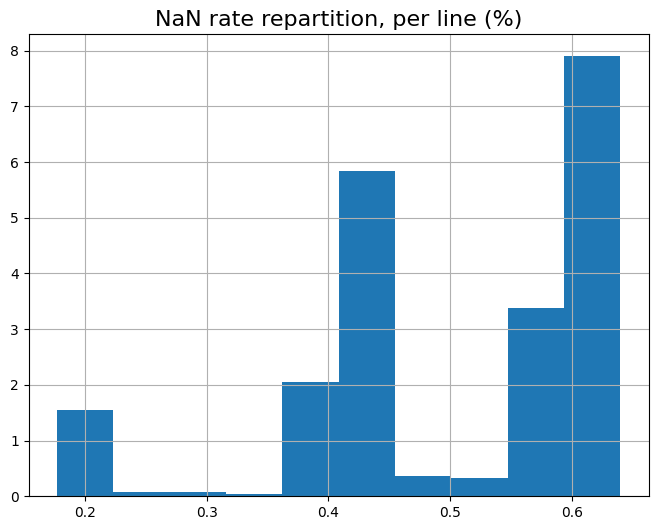

In [127]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

empty_lines.hist(density=True)
plt.title('NaN rate repartition, per line (%)');

The rate of missing values ​​rises to 0.6%.

### Number of `NaN` per year for the selected indicators, all countries combined

Does not tell us which indicators to choose.

In [60]:
dfEdStatsDataSelect.isna().sum(axis=0)

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
1970              7991
                  ... 
2090              7659
2095              7659
2100              7659
Interet (1-3)        0
Commentaire          0
Length: 71, dtype: int64

The columns of values ​​by year are indeed the most empty. Let's see which years are the emptiest.

In [131]:
non_nan_vals = dfEdStatsDataSelect[all_years].isna().sum(axis=0)/dfEdStatsDataSelect.shape[0]*100.

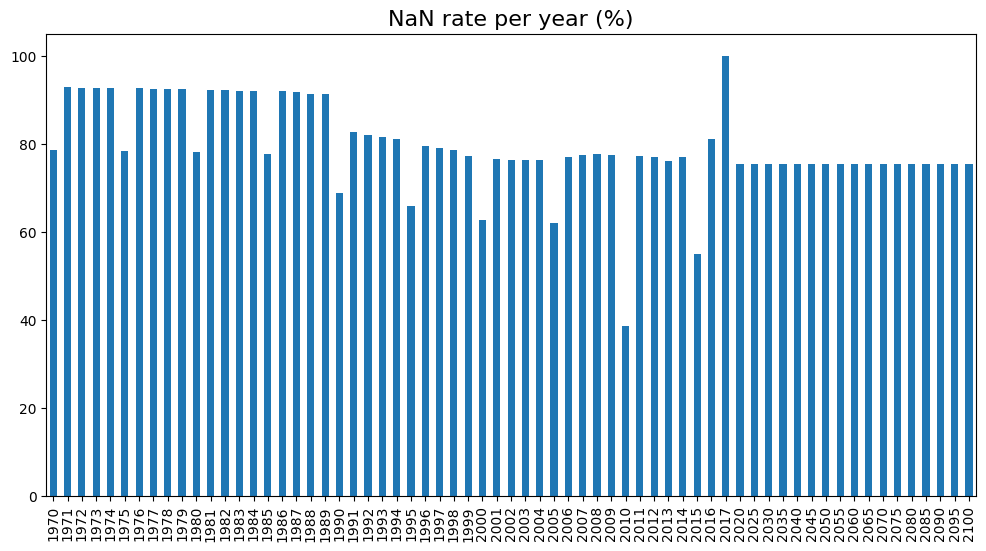

In [133]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

non_nan_vals.plot(kind='bar')
plt.title('NaN rate per year (%)'); #,fontsize=20

Overall, the last years (2000s) are a little busier, with one exception in 2017.
Again, the year 2020 has the same fill rate as the projection years, which suggests that it is itself rather projective.

For the issue of international expansion, we will consider:
 - the last known value for our indicators, up to 2017 included
 - if it is not too old (less than 10 years)
 - possibly, to decide between two countries, a trend over the past years (rise, sharp rise, fall, sharp fall, stagnation)
 - ditto for the values ​​given for future years.

In [134]:
# Current year
today_year = 2022 #date.today().year
keep_after = today_year - 10

# Limit year of retention of a value
print(f'Data kept after year: {keep_after}')

Data kept after year: 2012


In [135]:
dfEdStatsDataSelect.isna().sum(axis=0)

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
1970              7991
                  ... 
2090              7659
2095              7659
2100              7659
Interet (1-3)        0
Commentaire          0
Length: 71, dtype: int64

In [136]:
dfEdStatsDataSelect['2017'].shape[0] - dfEdStatsDataSelect['2017'].isna().sum(axis=0)

0

No data for the year 2017, for the pre-selected indicators!

**Conclusion:** Observation over all the years is of no interest in itself, and would be difficult given the missing data. As said above, we will be interested in recovering the last known value, indicator by indicator, with an age limit for it.

# Elimination of the time dimension

## Identification of the last year entered for each indicator, and the associated value

In [137]:
def last_year_and_val(df, ind, years, keep_after=2012):
    """Function identifying the last year entered for an indicator, and the associated value."""
    year = np.nan
    val = np.nan
    all_vals = df.loc[ind, years]
    for y in all_vals.index:
        v = df.loc[ind, y]
        if ~np.isnan(v) and int(y) >= keep_after:
            year = y
            val = v
    return year, val

In [138]:
def add_last_year_and_val(df, years, keep_after=2012):
    """Function creating the 'Last known year' columns and the associated 'Last known val' value for each indicator."""
    # Init
    df2 = df.copy()
    # Init des 2 colonnes supplémentaires
    df2['Last known year'] = np.nan
    df2['Last known val'] = np.nan
    # Pour chaque ligne, identification de la dernière année et valeur connue
    for ind in df2.index:
        year, val = last_year_and_val(df2, ind, years)
        df2.loc[ind, 'Last known year'] = year
        df2.loc[ind, 'Last known val'] = val
    return df2

In [139]:
dfEdStatsDataSelectLast = add_last_year_and_val(dfEdStatsDataSelect, past_years, keep_after)

In [140]:
dfEdStatsDataSelectLast.tail(30)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2075,2080,2085,2090,2095,2100,Interet (1-3),Commentaire,Last known year,Last known val
884964,Sweden,SWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,3932.98,3889.40,3832.09,3766.12,3697.29,3624.57,3.0,Information directe,2015,3577.30
884965,Switzerland,CHE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,4053.93,3970.46,3868.50,3748.99,3618.31,3483.26,3.0,Information directe,2015,3501.45
884966,Syrian Arab Republic,SYR,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,9009.15,9497.08,9905.87,10240.20,10504.76,10696.35,3.0,Information directe,2015,1701.47
884967,Tajikistan,TJK,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,5012.80,4953.56,4874.52,4779.55,4672.25,4557.21,3.0,Information directe,2015,2964.81
884968,Tanzania,TZA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,18585.92,21783.47,25092.18,28461.14,31814.61,35102.40,3.0,Information directe,2015,555.92
884969,Thailand,THA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,20593.94,20086.49,19427.43,18654.61,17817.38,16954.04,3.0,Information directe,2015,10316.57
884970,Timor-Leste,TLS,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,1009.97,1055.82,1090.79,1117.50,1137.69,1150.61,3.0,Information directe,2015,132.07
884971,Togo,TGO,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Information directe,NaN,NaN
884972,Tonga,TON,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,27.04,27.44,27.73,27.90,27.92,27.81,3.0,Information directe,2015,10.37
884973,Trinidad and Tobago,TTO,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,484.53,479.10,471.74,462.78,452.33,440.35,3.0,Information directe,2015,253.84


## Pivot table with selected countries and indicators

Now that we have added a column with the last available passed value, for all the indicators (including the preselected ones), we can continue with a table in which these indicators are repositioned in _column_.

In [141]:
dfEdStatsDataSelectLastOnly = dfEdStatsDataSelectLast.copy()
dfEdStatsDataSelectLastOnly.drop(all_years, axis=1, inplace=True)

In [142]:
tablePerCountry = dfEdStatsDataSelectLastOnly.pivot_table(
    index='Country Name', columns='Indicator Code', values='Last known val'
)

In [143]:
tablePerCountry.columns

Index(['HH.DHS.SCR', 'IT.NET.USER.P2', 'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.PP.KD',
       'NY.GNP.PCAP.CD', 'NY.GNP.PCAP.PP.CD', 'PRJ.ATT.15UP.2.MF',
       'PRJ.ATT.15UP.3.MF', 'PRJ.ATT.15UP.4.MF', 'PRJ.ATT.ALL.2.MF',
       'PRJ.ATT.ALL.3.MF', 'PRJ.ATT.ALL.4.MF', 'PRJ.POP.1519.3.MF',
       'PRJ.POP.1519.4.MF', 'PRJ.POP.2024.3.MF', 'PRJ.POP.2024.4.MF',
       'PRJ.POP.2529.3.MF', 'PRJ.POP.2529.4.MF', 'PRJ.POP.ALL.2.MF',
       'PRJ.POP.ALL.3.MF', 'PRJ.POP.ALL.4.MF', 'SL.TLF.ADVN.ZS',
       'SL.TLF.INTM.ZS', 'SL.TLF.TOTL.IN', 'SL.UEM.TOTL.ZS', 'SP.POP.GROW',
       'SP.POP.TOTL', 'UIS.G.5.B.T', 'UIS.G.6.T', 'UIS.G.7.T', 'UIS.G.8.T'],
      dtype='object', name='Indicator Code')

In [144]:
tablePerCountry

Indicator Code,HH.DHS.SCR,IT.NET.USER.P2,NY.GDP.PCAP.KD,NY.GDP.PCAP.PP.KD,NY.GNP.PCAP.CD,NY.GNP.PCAP.PP.CD,PRJ.ATT.15UP.2.MF,PRJ.ATT.15UP.3.MF,PRJ.ATT.15UP.4.MF,PRJ.ATT.ALL.2.MF,...,SL.TLF.ADVN.ZS,SL.TLF.INTM.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.ZS,SP.POP.GROW,SP.POP.TOTL,UIS.G.5.B.T,UIS.G.6.T,UIS.G.7.T,UIS.G.8.T
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,10.595726,596.257639,1739.583177,570.000000,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.055176e+07,8.600000,2.689163,3.465603e+07,NaN,24093.0,222.0,NaN
Albania,NaN,66.363445,4684.967034,11359.099157,4180.000000,11670.000000,0.44,0.39,0.08,0.35,...,73.199997,60.119999,1.331765e+06,15.200000,-0.159880,2.876101e+06,NaN,17469.0,11665.0,57.0
Algeria,NaN,42.945527,4827.724251,13921.180022,4220.000000,14420.000000,0.29,0.29,0.12,0.21,...,NaN,NaN,1.193704e+07,11.500000,1.825463,4.060605e+07,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,9614.472672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.111575,5.559900e+04,NaN,NaN,NaN,NaN
Andorra,NaN,97.930637,42681.603824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.944017,7.728100e+04,9.0,62.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,61.178385,2570.675723,NaN,3230.000000,NaN,0.31,0.23,0.15,0.19,...,77.919998,34.770000,1.247897e+06,27.000000,2.884693,4.551566e+06,6599.0,28623.0,2161.0,NaN
World,NaN,45.910282,10417.273208,15065.985048,10316.394305,16161.195984,0.23,0.27,0.13,0.17,...,NaN,NaN,3.415377e+09,5.738687,1.181680,7.442136e+09,NaN,NaN,NaN,NaN
"Yemen, Rep.",NaN,24.579208,679.667360,2325.069960,1040.000000,2500.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,6.256720e+06,16.200001,2.451502,2.758421e+07,NaN,NaN,NaN,NaN


## Addition of the info "is a country or region" in the table

Translation table `Country Code` ↦ `Country Name`:

In [145]:
dfEdStatsCountryLight = dfEdStatsCountry.copy()
dfEdStatsCountryLight = dfEdStatsCountryLight[['Country Code', 'Table Name', 'Region']]

In [146]:
dfEdStatsCountryLight.rename(columns={'Table Name': 'Country Name'}, inplace=True)

In [147]:
dfEdStatsCountryLight

,Country Code,Country Name,Region
0,ABW,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,South Asia
2,AGO,Angola,Sub-Saharan Africa
3,ALB,Albania,Europe & Central Asia
4,AND,Andorra,Europe & Central Asia
...,...,...,...
236,XKX,Kosovo,Europe & Central Asia
237,YEM,"Yemen, Rep.",Middle East & North Africa
238,ZAF,South Africa,Sub-Saharan Africa
239,ZMB,Zambia,Sub-Saharan Africa


Which country is missing in this table?

In [148]:
missing_countries = np.setdiff1d(list(tablePerCountry.index.unique()),
                               list(dfEdStatsCountryLight['Country Name'].unique()))
missing_countries

array(["Cote d'Ivoire", 'Curacao',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia (excluding high income)', 'Faroe Islands',
       'Korea, Dem. People’s Rep.',
       'Latin America & Caribbean (excluding high income)',
       'Middle East & North Africa (excluding high income)',
       'Sao Tome and Principe',
       'Sub-Saharan Africa (excluding high income)'], dtype='<U50')

In [149]:
len(missing_countries)

10

Interesting: 10 countries from the indicator table are not documented in the country table.

In [150]:
tablePerCountry.merge(dfEdStatsCountryLight, on='Country Name', how='outer')

,Country Name,HH.DHS.SCR,IT.NET.USER.P2,NY.GDP.PCAP.KD,NY.GDP.PCAP.PP.KD,NY.GNP.PCAP.CD,NY.GNP.PCAP.PP.CD,PRJ.ATT.15UP.2.MF,PRJ.ATT.15UP.3.MF,PRJ.ATT.15UP.4.MF,...,SL.TLF.TOTL.IN,SL.UEM.TOTL.ZS,SP.POP.GROW,SP.POP.TOTL,UIS.G.5.B.T,UIS.G.6.T,UIS.G.7.T,UIS.G.8.T,Country Code,Region
0,Afghanistan,NaN,10.595726,596.257639,1739.583177,570.0,1900.0,NaN,NaN,NaN,...,10551762.0,8.6,2.689163,34656032.0,NaN,24093.0,222.0,NaN,AFG,South Asia
1,Albania,NaN,66.363445,4684.967034,11359.099157,4180.0,11670.0,0.44,0.39,0.08,...,1331765.0,15.2,-0.159880,2876101.0,NaN,17469.0,11665.0,57.0,ALB,Europe & Central Asia
2,Algeria,NaN,42.945527,4827.724251,13921.180022,4220.0,14420.0,0.29,0.29,0.12,...,11937038.0,11.5,1.825463,40606052.0,NaN,NaN,NaN,NaN,DZA,Middle East & North Africa
3,American Samoa,NaN,NaN,9614.472672,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.111575,55599.0,NaN,NaN,NaN,NaN,ASM,East Asia & Pacific
4,Andorra,NaN,97.930637,42681.603824,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.944017,77281.0,9.0,62.0,NaN,1.0,AND,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Middle East & North Africa (all income levels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEA,NaN
247,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NRU,NaN
248,"Korea, Dem. Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRK,East Asia & Pacific
249,Sub-Saharan Africa (all income levels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SSF,NaN


In [151]:
tablePerCountry.columns

Index(['HH.DHS.SCR', 'IT.NET.USER.P2', 'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.PP.KD',
       'NY.GNP.PCAP.CD', 'NY.GNP.PCAP.PP.CD', 'PRJ.ATT.15UP.2.MF',
       'PRJ.ATT.15UP.3.MF', 'PRJ.ATT.15UP.4.MF', 'PRJ.ATT.ALL.2.MF',
       'PRJ.ATT.ALL.3.MF', 'PRJ.ATT.ALL.4.MF', 'PRJ.POP.1519.3.MF',
       'PRJ.POP.1519.4.MF', 'PRJ.POP.2024.3.MF', 'PRJ.POP.2024.4.MF',
       'PRJ.POP.2529.3.MF', 'PRJ.POP.2529.4.MF', 'PRJ.POP.ALL.2.MF',
       'PRJ.POP.ALL.3.MF', 'PRJ.POP.ALL.4.MF', 'SL.TLF.ADVN.ZS',
       'SL.TLF.INTM.ZS', 'SL.TLF.TOTL.IN', 'SL.UEM.TOTL.ZS', 'SP.POP.GROW',
       'SP.POP.TOTL', 'UIS.G.5.B.T', 'UIS.G.6.T', 'UIS.G.7.T', 'UIS.G.8.T'],
      dtype='object', name='Indicator Code')

## Summary of missing values ​​by country, all indicators combined

In [152]:
leaks = tablePerCountry.isna().sum(axis=1)
leakCountries = pd.DataFrame(index=leaks.index, columns=['Nb NaN'])
leakCountries['Nb NaN'] = leaks.values

In [153]:
leakCountries

,Nb NaN
Country Name,
Afghanistan,20
Albania,2
Algeria,7
American Samoa,28
Andorra,24
...,...
West Bank and Gaza,4
World,7
"Yemen, Rep.",22


<AxesSubplot: xlabel='Country Name'>

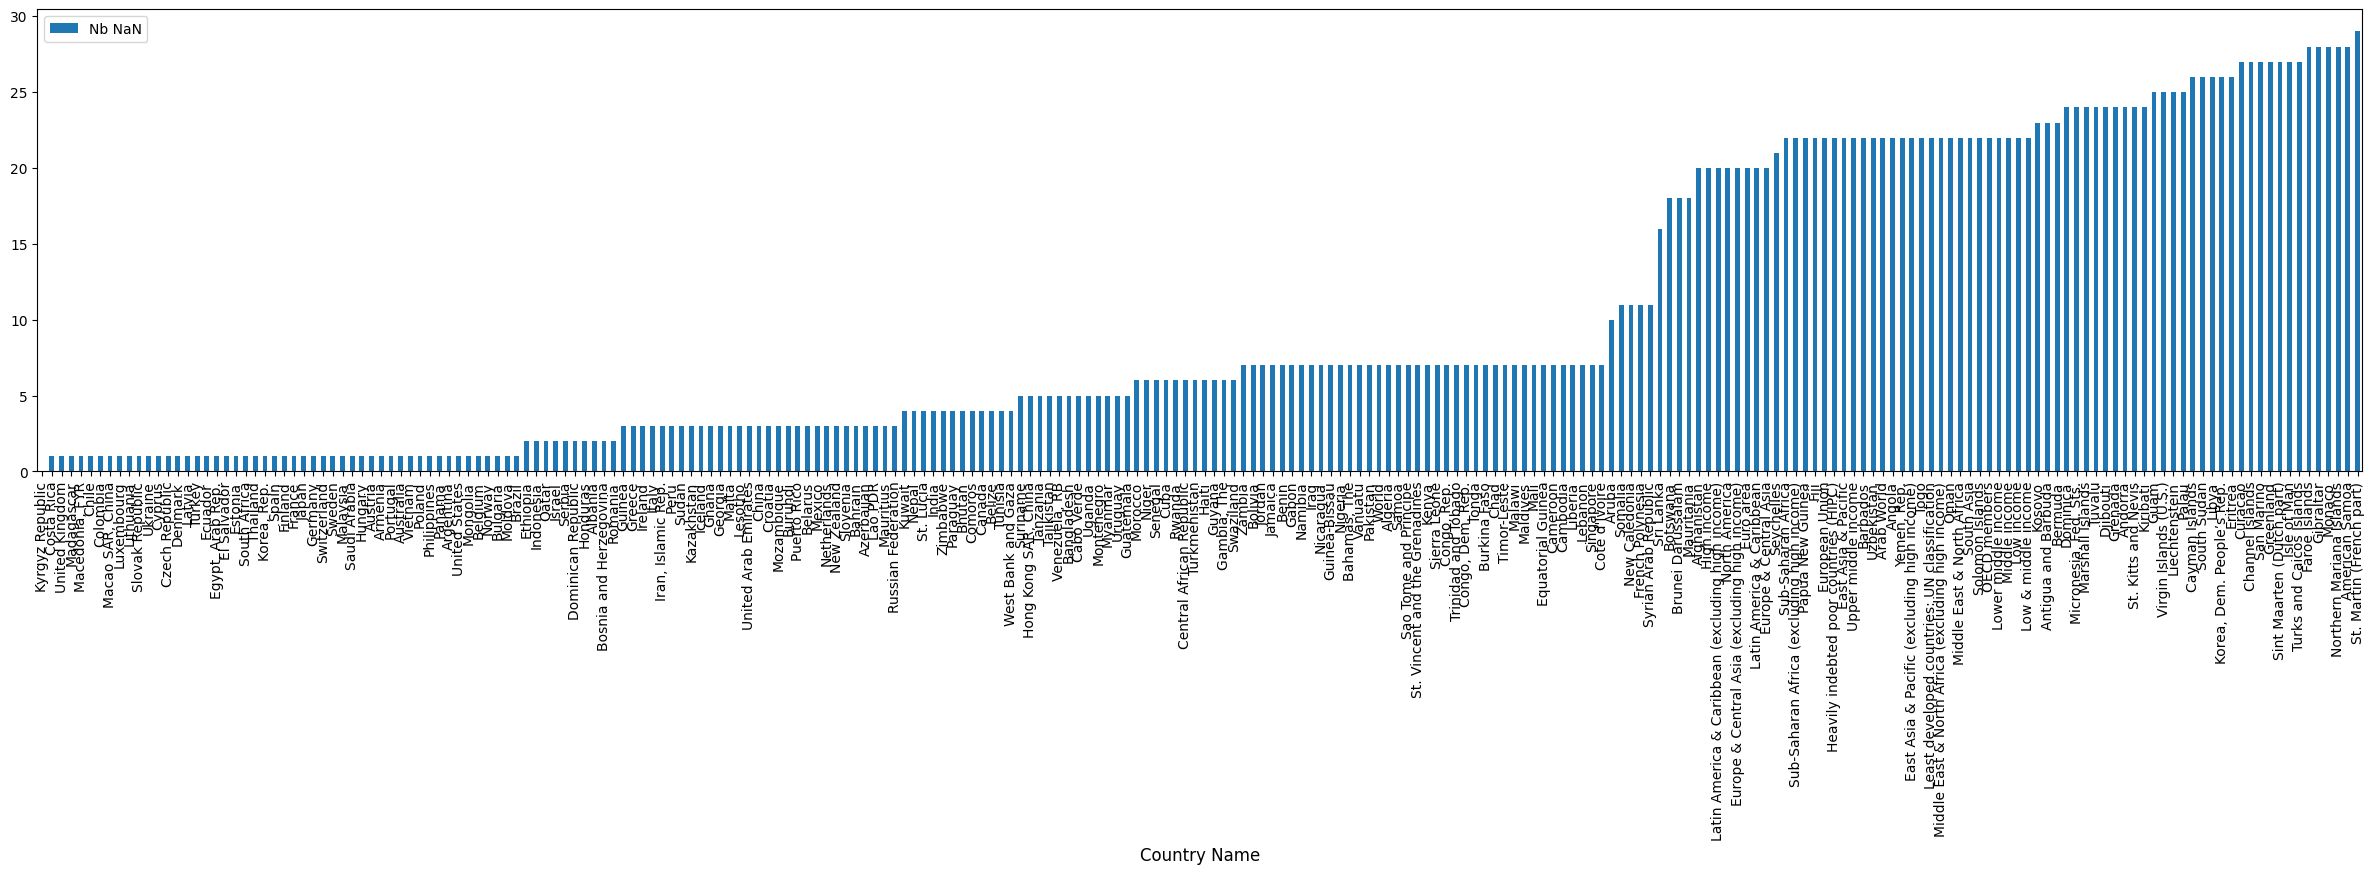

In [156]:
plt.rcParams['figure.figsize'] = [30, 6]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

leakCountries.sort_values(by='Nb NaN').plot(kind='bar')

Countries potentially exiting the analysis:

In [157]:
for country in leakCountries.loc[leakCountries['Nb NaN']>0].index:
    print(country)

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Arab World
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
East Asia & Pacific
East Asia & Pacific (excluding high income)
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Euro area
Europe & Central Asia
Europe & Central Asia (excluding high income)
European Union
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Hait

An elimination of countries with `NaN` would be too brutal.

## Table and passing function `Indicator Code` ↦ `Indicator Name`

In [158]:
dfEdStatsSeries

,Indicator Code,Indicator Name
0,BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age...
1,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...
2,BAR.NOED.15UP.FE.ZS,Barro-Lee: Percentage of female population age...
3,BAR.NOED.15UP.ZS,Barro-Lee: Percentage of population age 15+ wi...
4,BAR.NOED.2024.FE.ZS,Barro-Lee: Percentage of female population age...
...,...,...
3662,UIS.XUNIT.USCONST.56.FSGOV,Government expenditure per tertiary student (c...
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Government expenditure in secondary institutio...
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Government expenditure in tertiary institution...
3665,PRJ.ATT.ALL.MF,Percentage of secondary+


In [ ]:
dfEdStatsSeries = dfEdStatsSeries[['Series Code', 'Indicator Name']].copy()
dfEdStatsSeries.rename(columns={'Series Code': 'Indicator Code'},inplace=True)

In [163]:
def indic_code_to_name(indic_code, dfEdStatsSeries):
    """Passing function `Indicator Code` to `Indicator Name`."""
    indic_name = dfEdStatsSeries.loc[dfEdStatsSeries['Indicator Code']==indic_code]['Indicator Name']
    if not indic_name.empty:
        indic_name = indic_name.values[0]
    return indic_name

## Assessment of the completeness of indicators

In [164]:
leaksC = tablePerCountry.isna().sum(axis=0)
leakIndicsC = pd.DataFrame(index=leaksC.index, columns=['% NaN'])
leakIndicsC['% NaN'] = leaksC.values/tablePerCountry.shape[0]*100.

In [165]:
leakIndicsC

,% NaN
Indicator Code,
HH.DHS.SCR,97.500000
IT.NET.USER.P2,5.000000
NY.GDP.PCAP.KD,7.916667
NY.GDP.PCAP.PP.KD,11.250000
NY.GNP.PCAP.CD,10.833333
NY.GNP.PCAP.PP.CD,12.083333
PRJ.ATT.15UP.2.MF,30.416667
PRJ.ATT.15UP.3.MF,30.416667
PRJ.ATT.15UP.4.MF,30.416667


In [166]:
leakIndics = leakIndicsC.merge(dfEdStatsSeries, on='Indicator Code', how='left')

In [168]:
leakIndics.shape

(31, 3)

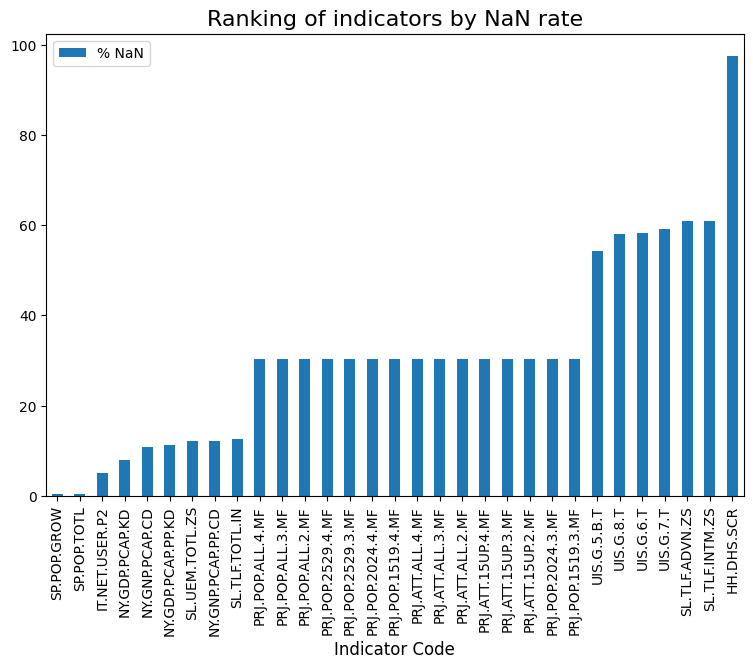

In [174]:
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

leakIndicsPlot = leakIndics[['Indicator Code', '% NaN']].copy().set_index('Indicator Code')
leakIndicsPlot.sort_values(by='% NaN', ascending=True).plot(kind='bar')
plt.title('Ranking of indicators by NaN rate')

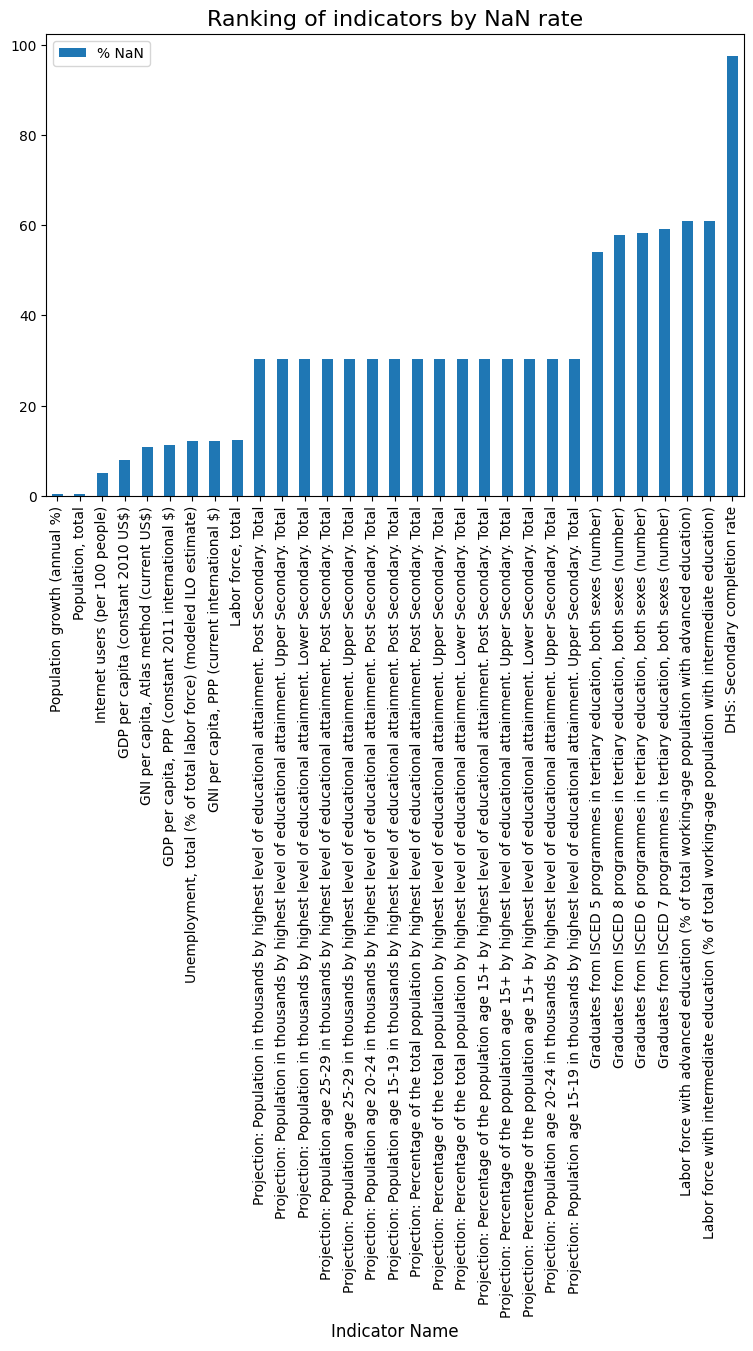

In [175]:
leakIndicsPlot = leakIndics[['Indicator Name', '% NaN']].copy().set_index('Indicator Name')
leakIndicsPlot.sort_values(by='% NaN', ascending=True).plot(kind='bar')
plt.title('Ranking of indicators by NaN rate');

It appears that the best informed indicator giving the number of people with the level "high school and above" is
the Wittgenstein: Population etc. The Barro-Lee is less well informed and the DHS is catastrophic.

**Note:** despite the term "Projection", the Wittgenstein indicators are indeed "current" values ​​and not temporal projections:
PRJ.ATT.ALL.3.MF = _Share of the population of the stated age group that has completed upper secondary or incomplete post-secondary education as the highest level of educational attainment. **Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model**. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. )_

# Conservation of the most complete indicators

In [176]:
bestIndic = leakIndics.sort_values(by='% NaN', ascending=True)

In [177]:
bestIndic

,Indicator Code,% NaN,Indicator Name
25,SP.POP.GROW,0.416667,Population growth (annual %)
26,SP.POP.TOTL,0.416667,"Population, total"
1,IT.NET.USER.P2,5.000000,Internet users (per 100 people)
2,NY.GDP.PCAP.KD,7.916667,GDP per capita (constant 2010 US$)
4,NY.GNP.PCAP.CD,10.833333,"GNI per capita, Atlas method (current US$)"
3,NY.GDP.PCAP.PP.KD,11.250000,"GDP per capita, PPP (constant 2011 internation..."
24,SL.UEM.TOTL.ZS,12.083333,"Unemployment, total (% of total labor force) (..."
5,NY.GNP.PCAP.PP.CD,12.083333,"GNI per capita, PPP (current international $)"
23,SL.TLF.TOTL.IN,12.500000,"Labor force, total"
20,PRJ.POP.ALL.4.MF,30.416667,Projection: Population in thousands by highest...


In [178]:
bestIndic.shape

(31, 3)

## First selection by lower values

In [179]:
bestIndic = bestIndic.loc[bestIndic['% NaN']<31.]

In [180]:
bestIndic

,Indicator Code,% NaN,Indicator Name
25,SP.POP.GROW,0.416667,Population growth (annual %)
26,SP.POP.TOTL,0.416667,"Population, total"
1,IT.NET.USER.P2,5.000000,Internet users (per 100 people)
2,NY.GDP.PCAP.KD,7.916667,GDP per capita (constant 2010 US$)
4,NY.GNP.PCAP.CD,10.833333,"GNI per capita, Atlas method (current US$)"
3,NY.GDP.PCAP.PP.KD,11.250000,"GDP per capita, PPP (constant 2011 internation..."
24,SL.UEM.TOTL.ZS,12.083333,"Unemployment, total (% of total labor force) (..."
5,NY.GNP.PCAP.PP.CD,12.083333,"GNI per capita, PPP (current international $)"
23,SL.TLF.TOTL.IN,12.500000,"Labor force, total"
20,PRJ.POP.ALL.4.MF,30.416667,Projection: Population in thousands by highest...


## Second ad-hoc selection

In [181]:
keptIndicC = ['SP.POP.TOTL','NY.GDP.PCAP.KD','IT.NET.USER.P2',
              'PRJ.ATT.ALL.2.MF','PRJ.ATT.ALL.3.MF','PRJ.ATT.ALL.4.MF',
              'PRJ.POP.ALL.2.MF','PRJ.POP.ALL.3.MF','PRJ.POP.ALL.4.MF'] # We loose the name "Wittgenstein ^^"

In [182]:
tablePerCountryKept = tablePerCountry[keptIndicC].copy()

In [183]:
tablePerCountryKept

Indicator Code,SP.POP.TOTL,NY.GDP.PCAP.KD,IT.NET.USER.P2,PRJ.ATT.ALL.2.MF,PRJ.ATT.ALL.3.MF,PRJ.ATT.ALL.4.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.3.MF,PRJ.POP.ALL.4.MF
Country Name,,,,,,,,,
Afghanistan,3.465603e+07,596.257639,10.595726,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2.876101e+06,4684.967034,66.363445,0.35,0.32,0.07,1155.12,1030.33,218.90
Algeria,4.060605e+07,4827.724251,42.945527,0.21,0.22,0.09,8129.13,8209.79,3441.06
American Samoa,5.559900e+04,9614.472672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,7.728100e+04,42681.603824,97.930637,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,4.551566e+06,2570.675723,61.178385,0.19,0.14,0.09,840.06,638.44,409.04
World,7.442136e+09,10417.273208,45.910282,0.17,0.20,0.10,1213698.37,1431279.74,725515.86
"Yemen, Rep.",2.758421e+07,679.667360,24.579208,NaN,NaN,NaN,NaN,NaN,NaN


## Merge of the 3 study levels "lower secondary", "upper secondary" and "post secondary"

The new indicator name will be 'PRJ.ATT.ALL.MF' and 'PRJ.POP.ALL.MF'

In [184]:
tablePerCountryKept['PRJ.ATT.ALL.MF'] = tablePerCountryKept['PRJ.ATT.ALL.2.MF'] + \
                                        tablePerCountryKept['PRJ.ATT.ALL.3.MF'] + \
                                        tablePerCountryKept['PRJ.ATT.ALL.4.MF']
tablePerCountryKept['PRJ.POP.ALL.MF'] = tablePerCountryKept['PRJ.POP.ALL.2.MF'] + \
                                        tablePerCountryKept['PRJ.POP.ALL.3.MF'] + \
                                        tablePerCountryKept['PRJ.POP.ALL.4.MF']

In [185]:
tablePerCountryKept

Indicator Code,SP.POP.TOTL,NY.GDP.PCAP.KD,IT.NET.USER.P2,PRJ.ATT.ALL.2.MF,PRJ.ATT.ALL.3.MF,PRJ.ATT.ALL.4.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.3.MF,PRJ.POP.ALL.4.MF,PRJ.ATT.ALL.MF,PRJ.POP.ALL.MF
Country Name,,,,,,,,,,,
Afghanistan,3.465603e+07,596.257639,10.595726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2.876101e+06,4684.967034,66.363445,0.35,0.32,0.07,1155.12,1030.33,218.90,0.74,2404.35
Algeria,4.060605e+07,4827.724251,42.945527,0.21,0.22,0.09,8129.13,8209.79,3441.06,0.52,19779.98
American Samoa,5.559900e+04,9614.472672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,7.728100e+04,42681.603824,97.930637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,4.551566e+06,2570.675723,61.178385,0.19,0.14,0.09,840.06,638.44,409.04,0.42,1887.54
World,7.442136e+09,10417.273208,45.910282,0.17,0.20,0.10,1213698.37,1431279.74,725515.86,0.47,3370493.97
"Yemen, Rep.",2.758421e+07,679.667360,24.579208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On ajoute une traduction à ces deux indicateurs.

In [186]:
dfNewIndic = pd.DataFrame({'Indicator Code': ['PRJ.ATT.ALL.MF', 'PRJ.POP.ALL.MF'],
                           'Indicator Name': ['Percentage of secondary+', 'Population in thousands of secondary+']})
dfEdStatsSeries = pd.concat([dfEdStatsSeries, dfNewIndic], sort=False, ignore_index=True)

In [187]:
dfEdStatsSeries

,Indicator Code,Indicator Name
0,BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age...
1,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...
2,BAR.NOED.15UP.FE.ZS,Barro-Lee: Percentage of female population age...
3,BAR.NOED.15UP.ZS,Barro-Lee: Percentage of population age 15+ wi...
4,BAR.NOED.2024.FE.ZS,Barro-Lee: Percentage of female population age...
...,...,...
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Government expenditure in tertiary institution...
3665,PRJ.ATT.ALL.MF,Percentage of secondary+
3666,PRJ.POP.ALL.MF,Population in thousands of secondary+
3667,PRJ.ATT.ALL.MF,Percentage of secondary+


In [188]:
keptIndicC.extend(['PRJ.ATT.ALL.MF', 'PRJ.POP.ALL.MF'])
keptIndicCfus = [
    'SP.POP.TOTL', 'NY.GDP.PCAP.KD', 'IT.NET.USER.P2',
    'PRJ.ATT.ALL.MF','PRJ.POP.ALL.MF'
]

## Conservation of countries with complete indicators

Number of countries before:

In [189]:
print(tablePerCountryKept.shape[0])

240


In [190]:
tablePerCountryKept = tablePerCountryKept.dropna(axis=0)

Number of countries after:

In [191]:
print(tablePerCountryKept.shape[0])

162


Add "is a region" column:

In [192]:
tablePerCountryKept = tablePerCountryKept.merge(dfEdStatsCountryLight, on='Country Name', how='left')

In [193]:
tablePerCountryKept

,Country Name,SP.POP.TOTL,NY.GDP.PCAP.KD,IT.NET.USER.P2,PRJ.ATT.ALL.2.MF,PRJ.ATT.ALL.3.MF,PRJ.ATT.ALL.4.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.3.MF,PRJ.POP.ALL.4.MF,PRJ.ATT.ALL.MF,PRJ.POP.ALL.MF,Country Code,Region
0,Albania,2.876101e+06,4684.967034,66.363445,0.35,0.32,0.07,1155.12,1030.33,218.90,0.74,2404.35,ALB,Europe & Central Asia
1,Algeria,4.060605e+07,4827.724251,42.945527,0.21,0.22,0.09,8129.13,8209.79,3441.06,0.52,19779.98,DZA,Middle East & North Africa
2,Argentina,4.384743e+07,10153.997912,70.150764,0.14,0.24,0.10,6086.68,10117.63,4106.84,0.48,20311.15,ARG,Latin America & Caribbean
3,Armenia,2.924816e+06,3932.554617,62.000000,0.08,0.53,0.17,236.86,1641.12,512.32,0.78,2390.30,ARM,Europe & Central Asia
4,Australia,2.412716e+07,55670.924143,88.238658,0.12,0.36,0.26,2860.70,8528.74,6276.89,0.74,17666.33,AUS,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Vietnam,9.270110e+07,1770.257906,46.500000,0.27,0.11,0.06,24528.74,10607.58,5425.93,0.44,40562.25,VNM,East Asia & Pacific
158,West Bank and Gaza,4.551566e+06,2570.675723,61.178385,0.19,0.14,0.09,840.06,638.44,409.04,0.42,1887.54,PSE,Middle East & North Africa
159,World,7.442136e+09,10417.273208,45.910282,0.17,0.20,0.10,1213698.37,1431279.74,725515.86,0.47,3370493.97,WLD,NaN
160,Zambia,1.659139e+07,1627.274704,25.506579,0.13,0.06,0.02,1946.93,953.63,353.71,0.21,3254.27,ZMB,Sub-Saharan Africa


## Sub-table of indicators by region

In [194]:
tablePerRegionKept = tablePerCountryKept.loc[tablePerCountryKept['Region'].isna()]

In [195]:
tablePerRegionKept

,Country Name,SP.POP.TOTL,NY.GDP.PCAP.KD,IT.NET.USER.P2,PRJ.ATT.ALL.2.MF,PRJ.ATT.ALL.3.MF,PRJ.ATT.ALL.4.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.3.MF,PRJ.POP.ALL.4.MF,PRJ.ATT.ALL.MF,PRJ.POP.ALL.MF,Country Code,Region
34,Cote d'Ivoire,2.369592e+07,1552.770420,26.527226,0.07,0.02,0.03,1456.83,473.26,600.03,0.12,2530.12,NaN,NaN
123,Sao Tome and Principe,1.999100e+05,1283.886707,28.000000,0.08,0.04,0.01,14.51,6.59,1.05,0.13,22.15,NaN,NaN
159,World,7.442136e+09,10417.273208,45.910282,0.17,0.20,0.10,1213698.37,1431279.74,725515.86,0.47,3370493.97,WLD,NaN


Strangely the "World" region remained while many countries were deleted. Data had to be estimated for this "region".

## Sub-table of indicators by country

In [196]:
tablePerCountryKept = tablePerCountryKept.loc[~tablePerCountryKept['Region'].isna()]

In [197]:
tablePerCountryKept

,Country Name,SP.POP.TOTL,NY.GDP.PCAP.KD,IT.NET.USER.P2,PRJ.ATT.ALL.2.MF,PRJ.ATT.ALL.3.MF,PRJ.ATT.ALL.4.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.3.MF,PRJ.POP.ALL.4.MF,PRJ.ATT.ALL.MF,PRJ.POP.ALL.MF,Country Code,Region
0,Albania,2876101.0,4684.967034,66.363445,0.35,0.32,0.07,1155.12,1030.33,218.90,0.74,2404.35,ALB,Europe & Central Asia
1,Algeria,40606052.0,4827.724251,42.945527,0.21,0.22,0.09,8129.13,8209.79,3441.06,0.52,19779.98,DZA,Middle East & North Africa
2,Argentina,43847430.0,10153.997912,70.150764,0.14,0.24,0.10,6086.68,10117.63,4106.84,0.48,20311.15,ARG,Latin America & Caribbean
3,Armenia,2924816.0,3932.554617,62.000000,0.08,0.53,0.17,236.86,1641.12,512.32,0.78,2390.30,ARM,Europe & Central Asia
4,Australia,24127159.0,55670.924143,88.238658,0.12,0.36,0.26,2860.70,8528.74,6276.89,0.74,17666.33,AUS,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,"Venezuela, RB",31568179.0,13708.984743,60.000000,0.12,0.16,0.16,3781.84,4885.03,5009.87,0.44,13676.74,VEN,Latin America & Caribbean
157,Vietnam,92701100.0,1770.257906,46.500000,0.27,0.11,0.06,24528.74,10607.58,5425.93,0.44,40562.25,VNM,East Asia & Pacific
158,West Bank and Gaza,4551566.0,2570.675723,61.178385,0.19,0.14,0.09,840.06,638.44,409.04,0.42,1887.54,PSE,Middle East & North Africa
160,Zambia,16591390.0,1627.274704,25.506579,0.13,0.06,0.02,1946.93,953.63,353.71,0.21,3254.27,ZMB,Sub-Saharan Africa


In [198]:
tablePerCountryKept.shape

(159, 14)

In [199]:
tablePerCountryKept.notna().sum().sum()

2226

# Analyses statistiques sur les indicateurs retenus

Translation of indicators for charts:

In [265]:
trad = {
    'SP.POP.TOTL': 'Total population',
    'NY.GDP.PCAP.KD': 'GDP/cap',
    'IT.NET.USER.P2': '% Internet coverage',
    'PRJ.ATT.ALL.MF': '% High school+',
    'PRJ.POP.ALL.MF': 'High school+',
}

## Univariate analysis

### Boxplots, with mean

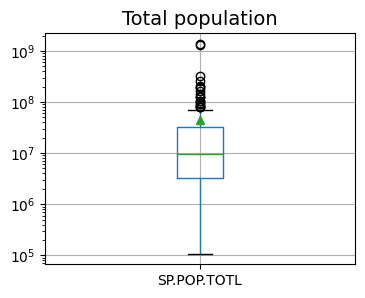

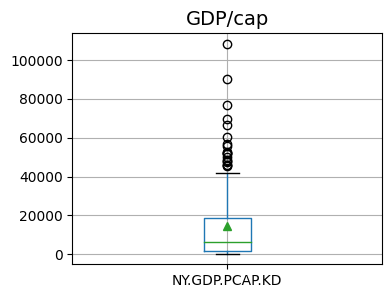

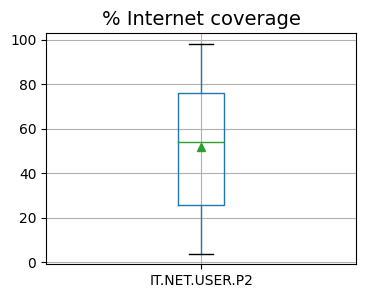

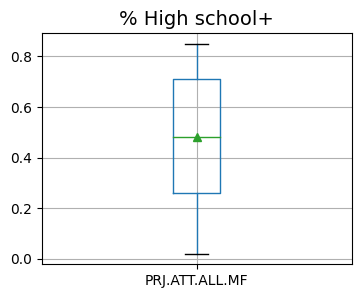

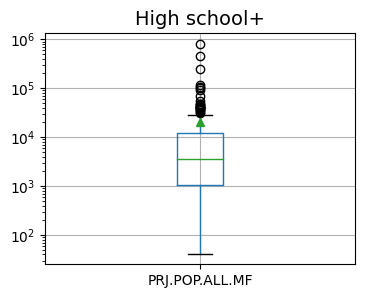

In [209]:
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

for col in keptIndicCfus:
    df = pd.DataFrame(tablePerCountryKept[['Country Name', col]])
    fig = plt.figure()
    df.boxplot(showmeans=True)
    plt.title(trad[col])
    if col in ['SP.POP.TOTL', 'PRJ.POP.ALL.MF']:
        plt.yscale('log')

- GDP/inhab: quite a few "superior" outliers
- Total population: 2 outliers (China and India)
- Internet coverage rate: fairly standard distribution
- High school attainment rate and above: fairly standard distribution (2 outliers)
- Number of people reaching high school and beyond: many outliers

### Empirical distribution of variables

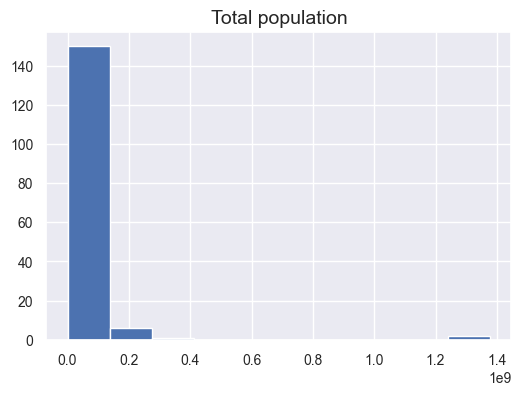

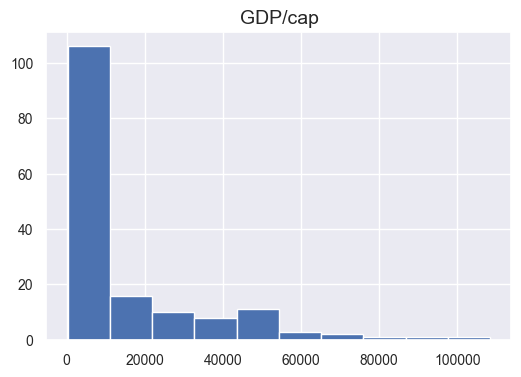

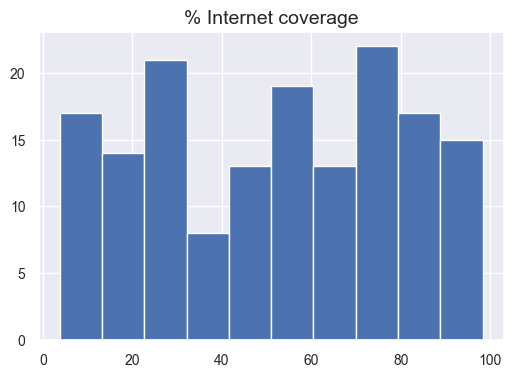

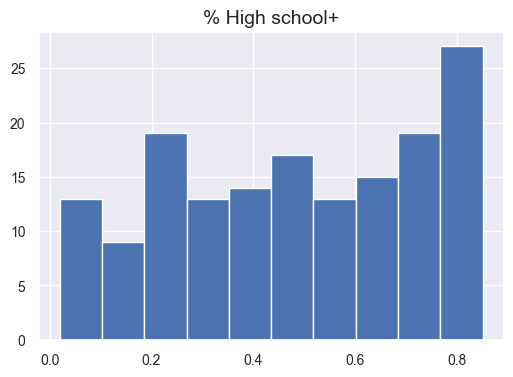

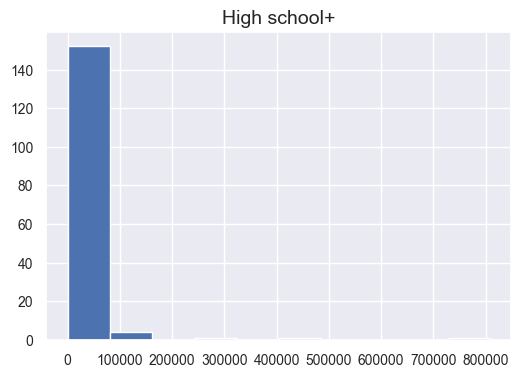

In [331]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

for col in keptIndicCfus:
    df = pd.DataFrame(tablePerCountryKept[['Country Name', col]])
    df.hist()
    plt.title(trad[col]);

Shape and flattening measurements won't tell us much.

### Lorenz curve and Gini index

The subject lends itself well to the examination of inequalities concerning our indicators. We use the code elements of the course on these curves.

In [266]:
def compute_lorenz_curve(table, line_feat, col):
    lorenz = None
    gini = None
    df = pd.DataFrame(table[[line_feat, col]])
    if df[col].dtypes not in ['float64']:
        return lorenz, gini
    val = df[col].values
    lorenz = np.cumsum(np.sort(val)) / val.sum()
    lorenz = np.append([0], lorenz) # Lorenz starts from 0

    # Area under the Lorenz curve.
    AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/len(val)
    # The first segment (lorenz[0]) is half below 0, so we cut it in 2, we do the same for the last segment Lorenz[-1] which is half above 1.
    # Area between the first bisector and the Lorenz curve
    S = 0.5 - AUC 
    gini = 2*S
    return lorenz, gini

def plot_lorenz_curve(lorenz, gini, trad):
    if lorenz is None or gini is None:
        return
    n = len(lorenz) - 1
    # There is one segment of size n for each individual, plus 1 additional segment of ordinate 0. 
    # The first segment starts at 0-1/n, and the last ends at 1+1/n
    xaxis = np.linspace(0, 1+1/n, n+1) 
    plt.plot(xaxis, lorenz, drawstyle='steps-post')
    plt.plot([0,1], [0,1])
    # Plot bisectrix
    t = trad[col] if col in trad else col
    plt.title(f'{t}\nGini: {gini:.2f}')
    plt.show()

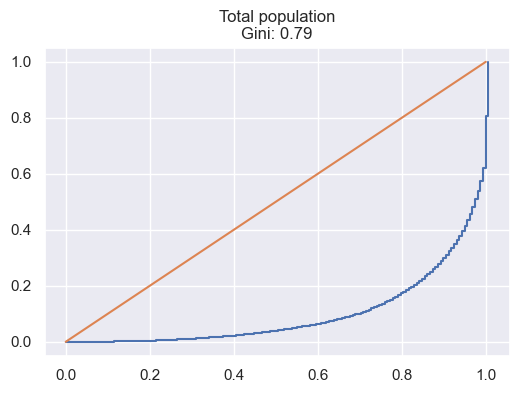

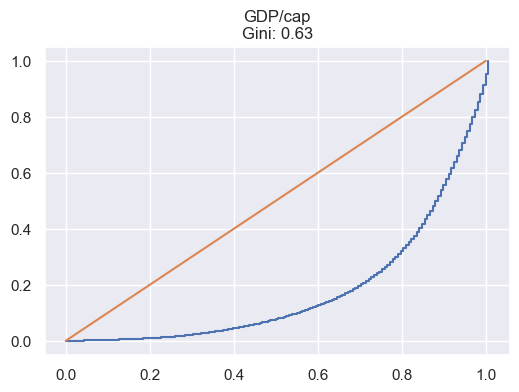

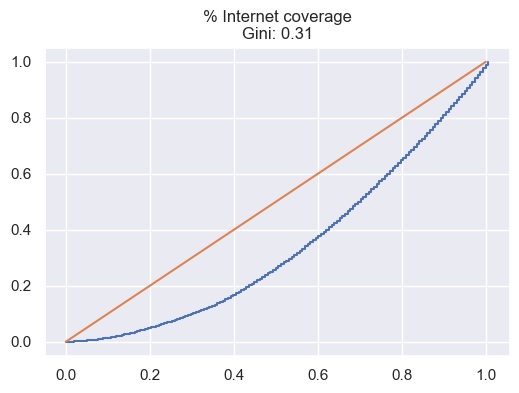

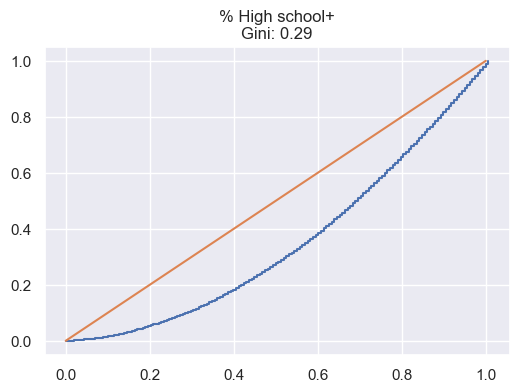

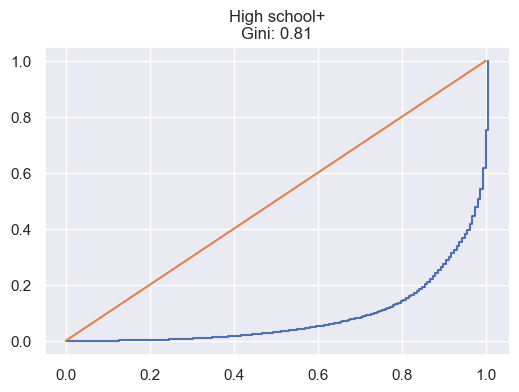

In [267]:
for col in keptIndicCfus:
    lorenz, gini = compute_lorenz_curve(tablePerCountryKept, 'Country Name', col)
    plot_lorenz_curve(lorenz, gini, trad)

## Bivariate analysis

### Correlation matrix

Renaming indicators for the overview chart:

In [236]:
tablePerCountryKeptTrad = tablePerCountryKept[keptIndicCfus].copy()
tablePerCountryKeptTrad.rename(trad,axis=1,inplace=True)

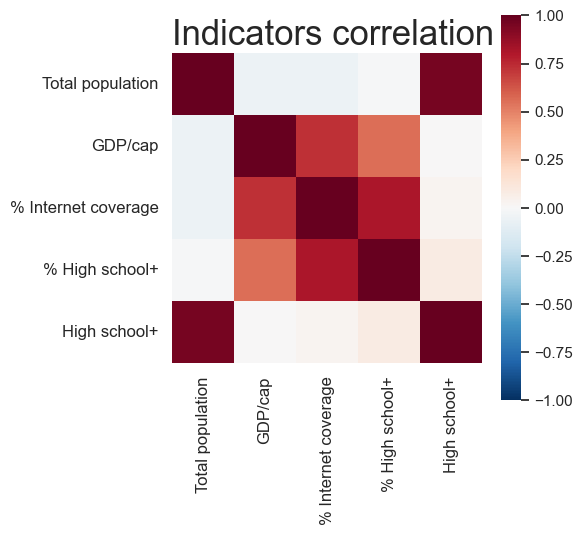

In [242]:
correl = tablePerCountryKeptTrad.corr(method='pearson')
sns.set(font_scale=2)
sns.set(rc={'figure.facecolor':'white'})
fig, ax = plt.subplots(figsize=(5, 5))
correl_final = sns.heatmap(correl, vmin=-1, vmax=1, center=0, cmap="RdBu_r", square=True, ax=ax);
correl_final.set_title('Indicators correlation', fontsize=25, loc='left');
correl_final.set_xticklabels(correl_final.get_xmajorticklabels(), fontsize = 12);
correl_final.set_yticklabels(correl_final.get_ymajorticklabels(), fontsize = 12);

Row by row of this matrix:
- The number of people with a "high school and above" level is correlated with the size of the population.
- GDP per capita is correlated to the _rate_ of people having reached post-secondary education (high value-added professions).
- GDP per capita is not correlated to the _number_ of people having reached the level "high school and above" (small highly educated countries are probably better than poorly educated gigacountries).
- On the other hand, the GDP per capita is not linked to the size of the population (is expansionism without education useful?).
- The internet connection rate is relatively correlated to GDP per capita, to the rate of people having reached a higher level of education, but not to the size of the population (internet allowed by income level).
- Levels of study are correlated with each other (coherent education policy).
- The rate and the number of people having reached the level "high school and above" are not correlated with each other.

### Scatterplots 2 by 2, for couples with a high correlation coefficient

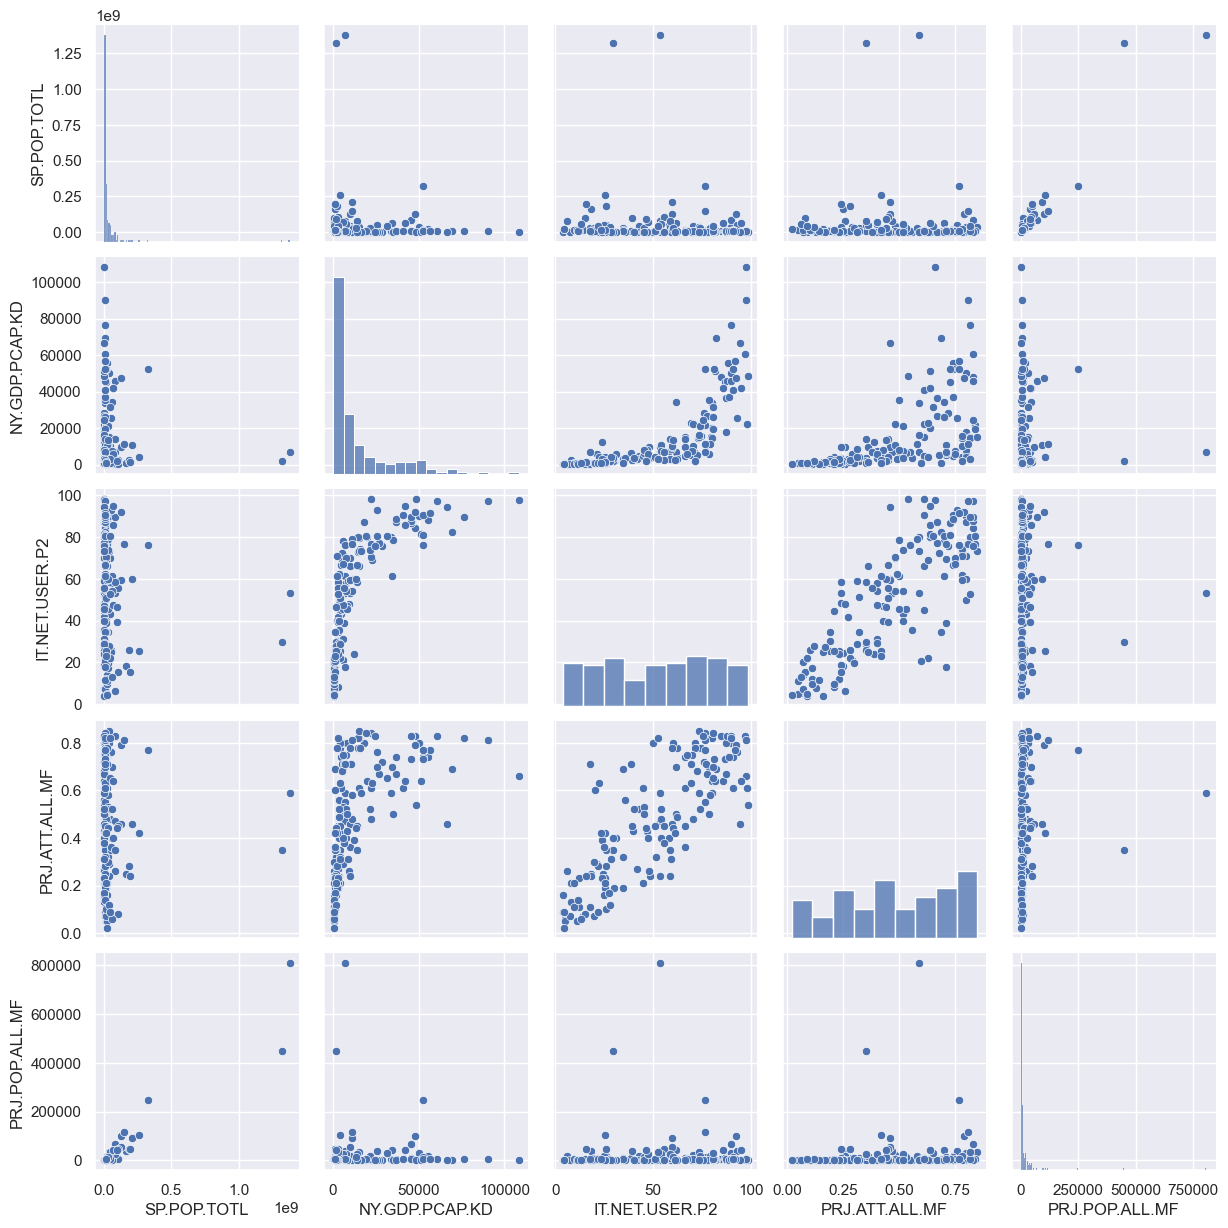

In [243]:
sns.pairplot(tablePerCountryKept[keptIndicCfus])

# New built indicators

In [244]:
tablePerCountryKept = tablePerCountryKept.copy()

## "Potential customers" indicator

By product of 'High school level and above' and 'Internet Users' (even if they are probably online).

In [245]:
tablePerCountryKept['Customers'] = tablePerCountryKept['PRJ.POP.ALL.MF'] * tablePerCountryKept['IT.NET.USER.P2'] / 100.

## Indicator "Potential turnover"

Let's set a training price proportional to GDP per capita, and uniform across countries, like 10% for example. The turnover will be the product of the number of potential customers, this rate and the GDP/capita.

In [246]:
price = 0.1

In [247]:
tablePerCountryKept['Potential turnover'] = price * tablePerCountryKept['Customers'] * tablePerCountryKept['NY.GDP.PCAP.KD']

This turnover will make it possible to make a classification of the countries.

## Final table

In [249]:
tablePerCountryKept.columns

Index(['Country Name', 'SP.POP.TOTL', 'NY.GDP.PCAP.KD', 'IT.NET.USER.P2',
       'PRJ.ATT.ALL.2.MF', 'PRJ.ATT.ALL.3.MF', 'PRJ.ATT.ALL.4.MF',
       'PRJ.POP.ALL.2.MF', 'PRJ.POP.ALL.3.MF', 'PRJ.POP.ALL.4.MF',
       'PRJ.ATT.ALL.MF', 'PRJ.POP.ALL.MF', 'Country Code', 'Region',
       'Customers', 'Potential turnover'],
      dtype='object')

In [250]:
tableCustom = tablePerCountryKept[['Country Name', 'Customers', 
                                   'NY.GDP.PCAP.KD', 'Potential turnover']].copy() # 'Connected population'

In [251]:
tableCustom

,Country Name,Customers,NY.GDP.PCAP.KD,Potential turnover
0,Albania,1595.609483,4684.967034,7.475378e+05
1,Algeria,8494.616628,4827.724251,4.100967e+06
2,Argentina,14248.426965,10153.997912,1.446785e+07
3,Armenia,1481.986000,3932.554617,5.827991e+05
4,Australia,15588.532519,55670.924143,8.678280e+07
...,...,...,...,...
156,"Venezuela, RB",8206.044000,13708.984743,1.124965e+07
157,Vietnam,18861.446250,1770.257906,3.338962e+06
158,West Bank and Gaza,1154.766485,2570.675723,2.968530e+05
160,Zambia,830.052944,1627.274704,1.350724e+05


## Univariate analysis

### Boxplots, with mean

In [252]:
tableCustom.columns

Index(['Country Name', 'Customers', 'NY.GDP.PCAP.KD', 'Potential turnover'], dtype='object')

In [254]:
tableCustom.rename({'NY.GDP.PCAP.KD': 'GDP/cap'}, axis=1, inplace=True)

In [255]:
new_cols = ['GDP/cap', 'Customers', 'Potential turnover']

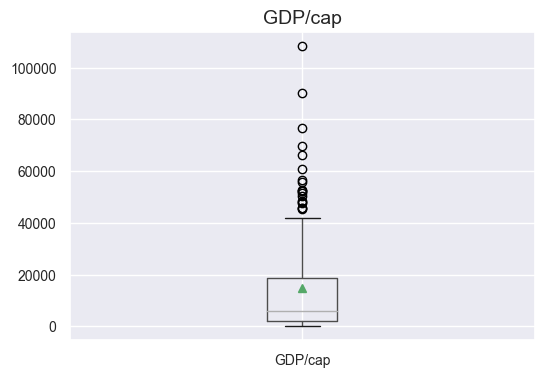

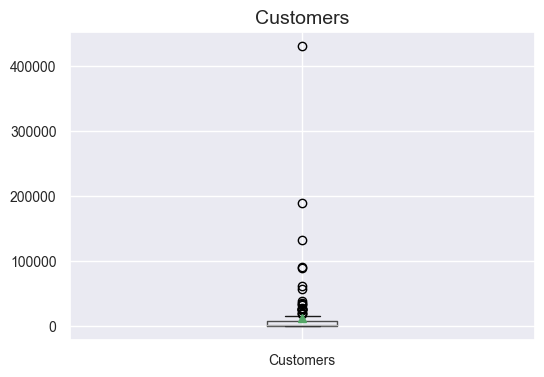

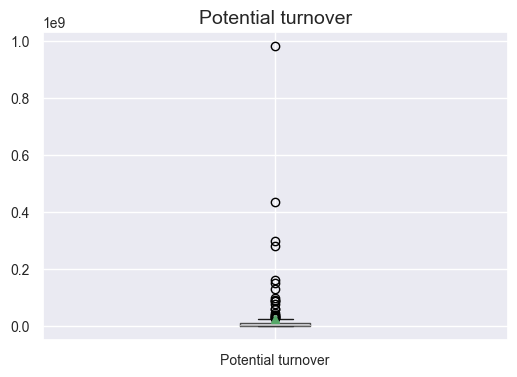

In [333]:
for col in new_cols:
    df = pd.DataFrame(tableCustom[['Country Name', col]])
    fig = plt.figure()
    df.boxplot(showmeans=True)
    plt.title(col);

Some countries are downright outliers on our final indicators. We must be able to select countries very clearly.

### Empirical distribution of variables

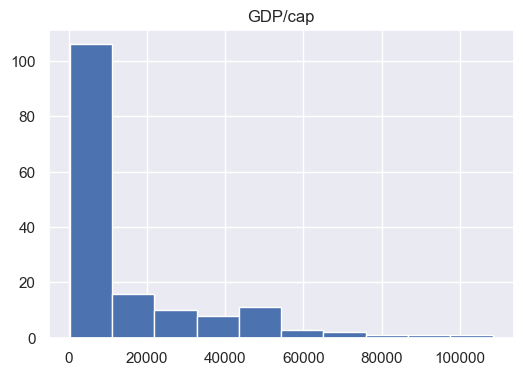

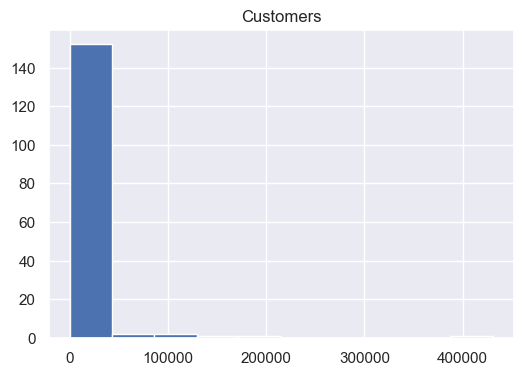

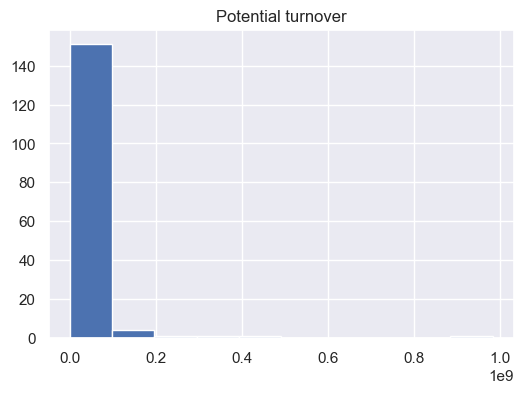

In [259]:
for col in new_cols:
    df = pd.DataFrame(tableCustom[['Country Name', col]])
    df.hist()
    plt.title(col)    

### Lorenz curve and Gini index

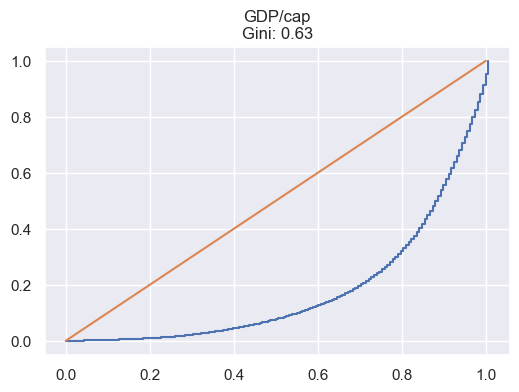

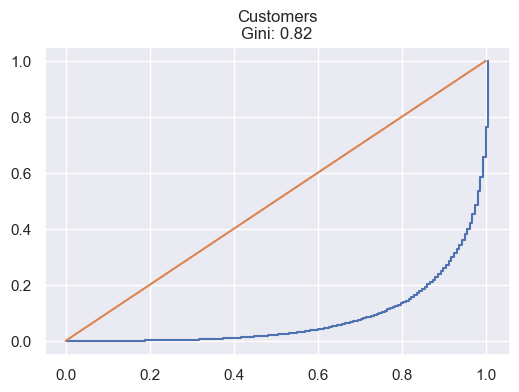

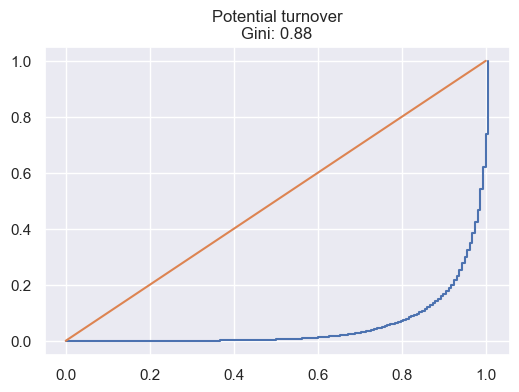

In [268]:
for col in new_cols:
    lorenz, gini = compute_lorenz_curve(tableCustom, 'Country Name', col)
    plot_lorenz_curve(lorenz, gini, trad)

Again, strong inequalities between countries, for these 3 indicators. We must be able to select countries very clearly.

## Bivariate analysis

### Correlation matrix

C:\Users\a072108\AppData\Local\Temp\ipykernel_6168\303624817.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = tableCustom.corr(method='pearson')


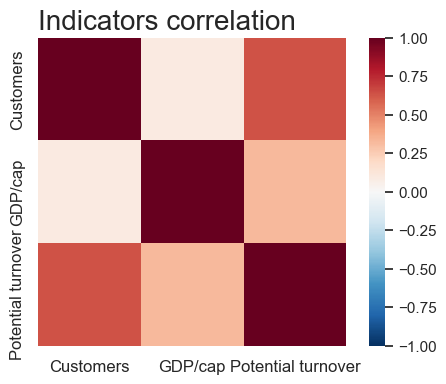

In [271]:
correl = tableCustom.corr(method='pearson')
sns.set(font_scale=2)
sns.set(rc={'figure.facecolor': 'white'})
fig, ax = plt.subplots()
correl_final = sns.heatmap(correl, vmin=-1, vmax=1,
                           center=0, cmap="RdBu_r", square=True, ax=ax)
correl_final.set_title('Indicators correlation', fontsize=20, loc='left');
correl_final.set_xticklabels(correl_final.get_xmajorticklabels(), fontsize=12);
correl_final.set_yticklabels(correl_final.get_ymajorticklabels(), fontsize=12);

Internet coverage is not so correlated to potential turnover.

### Scatterplots 2 by 2, for couples with a high correlation coefficient

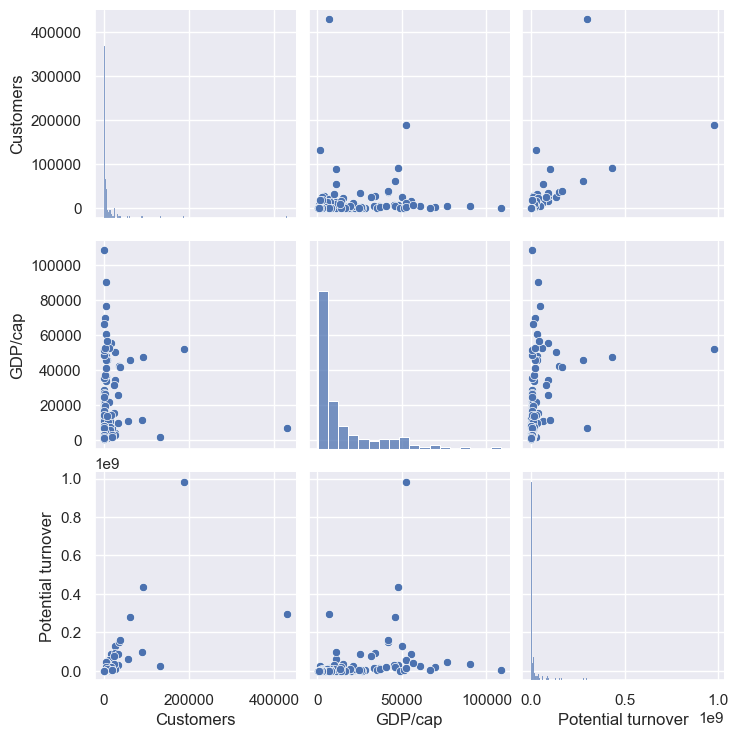

In [272]:
sns.pairplot(tableCustom)

Six points stand out clearly in terms of turnover (>0.2e11) (chart `Potential turnover` vs `Customers`)

Let's do a study between the GDP/capita and the number of customers:

Text(0.5, 1.0, 'GDP/cap vs potentials customers')

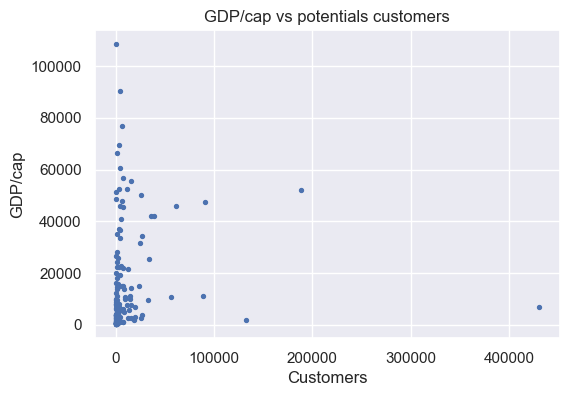

In [275]:
fig, ax = plt.subplots()
ax.scatter(tableCustom[['Customers']], tableCustom[['GDP/cap']], s=8)
plt.xlabel('Customers')
plt.ylabel('GDP/cap')
plt.title("GDP/cap vs potentials customers")

Let's annotate the countries with high `Customers` or `GDP/hab` values:

In [276]:
outliers = tableCustom.loc[(tableCustom['Customers']>60000.) | (tableCustom['GDP/cap']> 60000.) ]

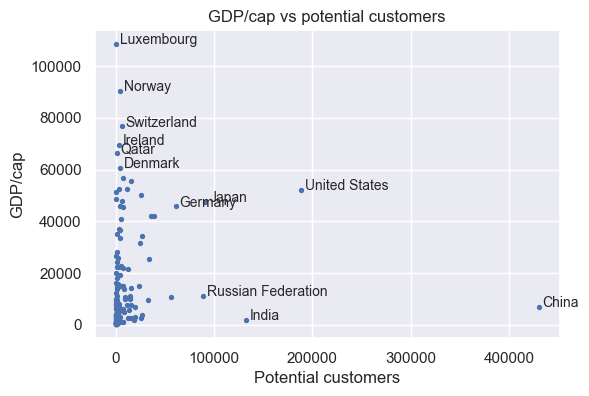

In [278]:
fig, ax = plt.subplots()
ax.scatter(tableCustom[['Customers']], tableCustom[['GDP/cap']], s=8)
plt.xlabel('Potential customers')
plt.ylabel('GDP/cap')
plt.title("GDP/cap vs potential customers");
for ind in outliers.index:
    line = outliers.loc[ind]
    ax.annotate(line['Country Name'], (line['Customers']+4000., line['GDP/cap']), fontsize=10)

We can identify:
 - countries with a very high GDP/capita, but a low number of customers (points at the top left)
 - a few countries with a high volume of potential customers, but with an average or even low GDP/capita (bottom right).

In the first case, there will be a _price_ effect on turnover, and a _volume_ effect in the second case.

**We therefore favor classification by potential turnover.**

## Ranking by potential turnover

In [279]:
tableCustom.loc[tableCustom['Country Name']=='Angola']

,Country Name,Customers,GDP/cap,Potential turnover


In [280]:
tableCustomSort = tableCustom.sort_values(by='Potential turnover', ascending=False).set_index('Country Name')

We don't see much, let's create a "top 20":

In [281]:
top20 = tableCustomSort.iloc[0:20]['Potential turnover']

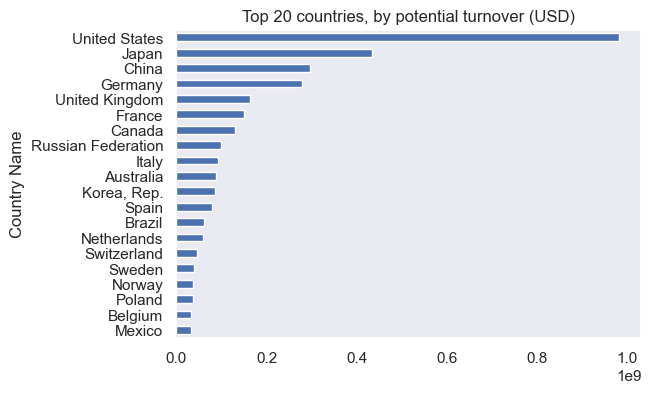

In [282]:
top20.iloc[::-1].plot(kind='barh', grid=False,rot=0)
plt.title("Top 20 countries, by potential turnover (USD)");

## Calculation of trends

### Added new indicators

As the price of a training, let us fix a homogeneous percentage of the GDP/inhabitant:

In [283]:
price = 0.1

In [284]:
dfDataKeptIndic = dfEdStatsDataSelectLast.loc[dfEdStatsDataSelect['Indicator Code'].isin(keptIndicC)].copy()

In [285]:
def add_indicators(df,years):
    df2 = df.copy()
    # Country by country
    for country in df2['Country Name'].unique():
        # 'Secondary+'
        vals = df2.loc[(df2['Country Name']==country) & (df2['Indicator Code']=='PRJ.POP.ALL.2.MF')][years] + \
               np.array(df2.loc[(df2['Country Name']==country) & (df2['Indicator Code']=='PRJ.POP.ALL.3.MF')][years]) + \
               np.array(df2.loc[(df2['Country Name']==country) & (df2['Indicator Code']=='PRJ.POP.ALL.4.MF')][years])
        if vals.size:
            data = {y:vals[y] for y in years}
        else:
            data = {y:np.nan for y in years}
        # if country=='France': print(data)
        data['Country Name'] = [country]
        data['Indicator Code'] = ['PRJ.POP.ALL.MF']
        df2 = pd.concat([df2,pd.DataFrame(data)], sort=False, ignore_index=True)

        # 'Customers'
        # if country=='France':
        #     print(df2.loc[(df2['Country Name']==country) & (df2['Indicator Code']=='PRJ.POP.ALL.MF')][years])
        vals = df2.loc[(df2['Country Name']==country) & (df2['Indicator Code']=='PRJ.POP.ALL.MF')][years] * \
               np.array(df2.loc[(df2['Country Name']==country) & (df2['Indicator Code']=='IT.NET.USER.P2')][years]) / 100.
        if vals.size:
            data = {y:vals[y] for y in years}
        else:
            data = {y:np.nan for y in years}
        data['Country Name'] = [country]
        data['Indicator Name'] = ['Customers']
        df2 = pd.concat([df2,pd.DataFrame(data)], sort=False, ignore_index=True)

        # 'Potential turnover'
        vals = price * df2.loc[(df2['Country Name']==country) & (df2['Indicator Name']=='Customers')][years] * \
               np.array(df2.loc[(df2['Country Name']==country) & (df2['Indicator Code']=='NY.GDP.PCAP.KD')][years])
        if vals.size:
            data = {y:vals[y] for y in years}
        else:
            data = {y:np.nan for y in years}
        data['Country Name'] = [country]
        data['Indicator Name'] = ['Potential turnover']
        df2 = pd.concat([df2,pd.DataFrame(data)], sort=False, ignore_index=True)
        
    return df2

In [286]:
dfDataKeptIndicAdd = add_indicators(dfDataKeptIndic, all_years)

In this first version of the calculation of values, we note that the "internet coverage" ('IT.NET.USER.P2') and "GDP/capita" ('NY.GDP.PCAP.KD') indicators are not available for projected years:

In [287]:
dfDataKeptIndicAdd.loc[dfDataKeptIndicAdd['Indicator Code']=='IT.NET.USER.P2'][proj_years].isna().all().all()

True

In [288]:
dfDataKeptIndicAdd.loc[dfDataKeptIndicAdd['Indicator Code']=='NY.GDP.PCAP.KD'][proj_years].isna().all().all()

True

Multiplying other indicators by their missing values ​​therefore destroyed the values. For the future trend, we will work with the last known value of these indicators. We therefore impute the projective values ​​with the last known value, country by country:

In [289]:
def impute_proj_years(df, indic_col, indic_list, proj_years):
    """Impute the values of the columns "proj_years" with the last available value in the column 'Last known val'
    for the rows having the column indic_col belonging to the list indic_list."""
    # Init
    df2 = df.copy()
    # For each line, identification of the last year and known value
    for ind in df2.index:
        # If the line does not concern the indicators targeted by the imputation, the line is changed
        if not df2.loc[ind, indic_col] in indic_list:
            continue
        val = df2.loc[ind, 'Last known val']
        for y in proj_years:
            df2.loc[ind, y] = val
    return df2

In [290]:
indic_col = 'Indicator Code'
indic_list = ['IT.NET.USER.P2', 'NY.GDP.PCAP.KD']

dfDataKeptIndicImput = impute_proj_years(dfDataKeptIndic, indic_col, indic_list, proj_years)

We can start adding indicators again:

In [291]:
dfDataKeptIndicAdd = add_indicators(dfDataKeptIndicImput, all_years)

In [292]:
dfDataKeptIndicAdd.loc[dfDataKeptIndicAdd['Indicator Code']=='IT.NET.USER.P2']

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2075,2080,2085,2090,2095,2100,Interet (1-3),Commentaire,Last known year,Last known val
242,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,36.868602,36.868602,36.868602,36.868602,36.868602,36.868602,3.0,Nb de diplômés,2013,36.868602
243,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,52.796321,52.796321,52.796321,52.796321,52.796321,52.796321,3.0,Nb de diplômés,2016,52.796321
244,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,48.386621,48.386621,48.386621,48.386621,48.386621,48.386621,3.0,Nb de diplômés,2016,48.386621
245,Euro area,EMU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,80.446726,80.446726,80.446726,80.446726,80.446726,80.446726,3.0,Nb de diplômés,2016,80.446726
246,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,73.914751,73.914751,73.914751,73.914751,73.914751,73.914751,3.0,Nb de diplômés,2016,73.914751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,Virgin Islands (U.S.),VIR,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,59.608316,59.608316,59.608316,59.608316,59.608316,59.608316,3.0,Nb de diplômés,2016,59.608316
480,West Bank and Gaza,PSE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,61.178385,61.178385,61.178385,61.178385,61.178385,61.178385,3.0,Nb de diplômés,2016,61.178385
481,"Yemen, Rep.",YEM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,24.579208,24.579208,24.579208,24.579208,24.579208,24.579208,3.0,Nb de diplômés,2016,24.579208
482,Zambia,ZMB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,25.506579,25.506579,25.506579,25.506579,25.506579,25.506579,3.0,Nb de diplômés,2016,25.506579


In [293]:
dfDataKeptIndicAdd.loc[dfDataKeptIndicAdd['Indicator Code']=='IT.NET.USER.P2'][proj_years].isna().all().all()

False

### Trend calculations

In [294]:
nb_vals = 10

In [295]:
last_years = past_years[-1:-nb_vals-1:-1]

In [296]:
last_years

['2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008']

In [297]:
next_years = proj_years[0:nb_vals]

In [298]:
next_years

['2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050',
 '2055',
 '2060',
 '2065']

Calculation of a trend on the `past_years` and `proj_years`, and addition in columns of the cross table, with symbols --,-,=,+,++

In [299]:
import statsmodels.api as sm

def coeff2symbol(a):
    symbol = 'N/A'
    if np.isnan(a):
        symbol = 'N/A'
    elif a<-0.05:
        symbol = '--'
    elif a<-0.02:
        symbol = '-'
    elif a<0.02:
        symbol = '='
    elif a<0.05:
        symbol = '+'
    else:
        symbol = '++'
    return symbol

def add_trend(df, years, type='past'):
    # Init
    df2 = df.copy()
    new_col = 'Trend for the '+type+' years'
    df2[new_col] = coeff2symbol(np.nan)
    # For each line, identification of the last year and known value
    for ind in df2.index:
        dfReg = pd.DataFrame({'years':  [float(y) for y in years],
                          'values': df2.loc[ind, years].values})
        # Suppress lines with NaN
        dfReg.dropna(axis=0,subset=['values'],inplace=True)
        
        # Test number of available points
        if dfReg.shape[0]<2:
            # Not enough points, we put a NaN
            df2.loc[ind,new_col] = coeff2symbol(np.nan)
            continue
        
        Y = dfReg['values'].to_numpy().reshape(-1,1)
        X = dfReg[['years']]
        X['intercept'] = 1.
        X = X.to_numpy()
        
        # Linear regression by an OLS (Ordinary Least Square)
        result = sm.OLS(Y, X, missing='drop').fit()
        a, b = result.params[0], result.params[1]
        if np.abs(Y.mean())<EPSILON:
            a2 = 0.
        else :
            a2 = a/Y.mean()
        df2.loc[ind, new_col] = coeff2symbol(a2)
    return df2

In [300]:
dfDataKeptIndicAddTrend = add_trend(dfDataKeptIndicAdd, last_years, 'last')

In [301]:
dfDataKeptIndicAddTrend = add_trend(dfDataKeptIndicAddTrend, next_years, 'next')

In [302]:
last_trend = dfDataKeptIndicAddTrend.pivot_table(index='Country Name',
                                                 columns='Indicator Name',
                                                 values=['Trend for the last years'],
                                                 aggfunc='last')

In [303]:
next_trend = dfDataKeptIndicAddTrend.pivot_table(index='Country Name',
                                                 columns='Indicator Name',
                                                 values=['Trend for the next years'],
                                                 aggfunc='last')

We gather the trends in the main table:

In [304]:
df_last_trend = last_trend['Trend for the last years']
df_next_trend = next_trend['Trend for the next years']

In [305]:
df_last_trend = df_last_trend.copy()
df_last_trend.rename({'Potential turnover':'PTO trend, last years'}, axis=1, inplace=True)
df_last_trend.rename({'Customers':'Customers trend, last years'}, axis=1, inplace=True)
df_next_trend = df_next_trend.copy()
df_next_trend.rename({'Potential turnover':'PTO trend, next years'}, axis=1, inplace=True)
df_next_trend.rename({'Customers':'Customers trend, next years'}, axis=1, inplace=True)

In [306]:
tableCustomSortTrend = tableCustomSort.merge(df_last_trend, on='Country Name', how='left')
tableCustomSortTrend = tableCustomSortTrend.merge(df_next_trend, on='Country Name', how='left')

In [307]:
tableCustomSortTrend.head(20)

,Customers,GDP/cap,Potential turnover,"Customers trend, last years",GDP per capita (constant 2005 US$)_x,Internet users (per 100 people)_x,"Population, total_x","PTO trend, last years",Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total_x,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total_x,...,GDP per capita (constant 2005 US$)_y,Internet users (per 100 people)_y,"Population, total_y","PTO trend, next years",Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total_y,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total_y,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total_y,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Lower Secondary. Total_y,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total_y,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total_y
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,188119.640329,52262.784161,9.831656e+08,=,=,=,=,+,-,=,...,=,=,N/A,=,=,=,=,=,=,=
Japan,91135.494400,47623.270931,4.340170e+08,+,=,+,=,+,=,=,...,=,=,N/A,=,=,=,=,-,=,=
China,430386.845560,6893.776361,2.966991e+08,++,++,++,=,++,=,+,...,=,=,N/A,=,=,+,=,=,=,=
Germany,60907.253153,45745.789904,2.786250e+08,=,=,=,=,+,=,+,...,=,=,N/A,=,=,=,=,=,=,=
United Kingdom,38668.517179,41954.737517,1.622327e+08,+,=,+,=,+,=,=,...,=,=,N/A,=,=,=,=,=,=,=
France,35503.690445,42013.286291,1.491627e+08,+,=,+,=,+,=,=,...,=,=,N/A,=,=,=,=,=,=,=
Canada,25746.113616,50231.885199,1.293276e+08,+,=,=,=,+,-,=,...,=,=,N/A,=,-,=,=,-,=,=
Russian Federation,88669.220939,11099.173057,9.841550e+07,++,=,++,=,++,-,=,...,=,=,N/A,=,=,=,=,-,=,=
Italy,26515.766755,34377.925750,9.115571e+07,+,=,+,=,=,=,+,...,=,=,N/A,=,=,=,=,=,=,=


On a l'impression que toutes les tendances futures sont à la stagnation, vérifions que ce n'est pas le cas :

In [334]:
tableCustomSortTrend['PTO trend, next years'].value_counts()

=     114
+      44
++      1
Name: PTO trend, next years, dtype: int64

OK, not all countries are stagnating.

Table for presentation: target population and trend

In [309]:
# trad['Potential turnover'] = "Chiffre d'aff. potentiel"
# trad['PTO trend, last years'] = "Tendance CA"
# trad['Customers'] = "Clients potentiels"
# trad['Customers trend, last years'] = "Tendance CP"
# trad['Country Name'] = "Pays"
trad['Potential turnover'] = "Potential turnover"
trad['PTO trend, last years'] = "PTO trend, last years"
trad['Customers'] = "Potential customers"
trad['Customers trend, last years'] = "Customers trend, last years"
trad['Country Name'] = "Country Name"

In [310]:
tableCustomSortTrendTrad = tableCustomSortTrend.copy()
tableCustomSortTrendTrad.rename(trad, axis=1, inplace=True)

In [312]:
tableCustomSortTrendTrad[[trad['Customers'], trad['Customers trend, last years']]].head(10)

,Potential customers,"Customers trend, last years"
Country Name,,
United States,188119.640329,=
Japan,91135.494400,+
China,430386.845560,++
Germany,60907.253153,=
United Kingdom,38668.517179,+
France,35503.690445,+
Canada,25746.113616,+
Russian Federation,88669.220939,++
Italy,26515.766755,+


Table for the presentation: population and trend (because requested in the statement)

In [313]:
tableCustomSortTrendTrad[[trad['Customers'], trad['Customers trend, last years']]].head(20)

,Potential customers,"Customers trend, last years"
Country Name,,
United States,188119.640329,=
Japan,91135.494400,+
China,430386.845560,++
Germany,60907.253153,=
United Kingdom,38668.517179,+
France,35503.690445,+
Canada,25746.113616,+
Russian Federation,88669.220939,++
Italy,26515.766755,+


In [314]:
tableCustomSortTrendTrad[[trad['Customers'], trad['Customers trend, last years'], 
                          trad['Potential turnover'], trad['PTO trend, last years']]].head(20)

,Potential customers,"Customers trend, last years",Potential turnover,"PTO trend, last years"
Country Name,,,,
United States,188119.640329,=,9.831656e+08,+
Japan,91135.494400,+,4.340170e+08,+
China,430386.845560,++,2.966991e+08,++
Germany,60907.253153,=,2.786250e+08,+
United Kingdom,38668.517179,+,1.622327e+08,+
France,35503.690445,+,1.491627e+08,+
Canada,25746.113616,+,1.293276e+08,+
Russian Federation,88669.220939,++,9.841550e+07,++
Italy,26515.766755,+,9.115571e+07,=


# Map Monde

In [315]:
import geopandas as gpd

In [316]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


We have countries with an ISO A3 code of -99, which poses problems.

In [317]:
world.loc[world['iso_a3']=='-99']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


We manage them ad hoc:

In [318]:
world.loc[world['name']=='Norway','iso_a3'] = 'NOR'
world.loc[world['name']=='France','iso_a3'] = 'FRA'
world.loc[world['name']=='N. Cyprus','iso_a3'] = 'CYP'
world.loc[world['name']=='Somaliland','iso_a3'] = 'SOM'
world.loc[world['name']=='Kosovo','iso_a3'] = 'XKX'

<AxesSubplot: >

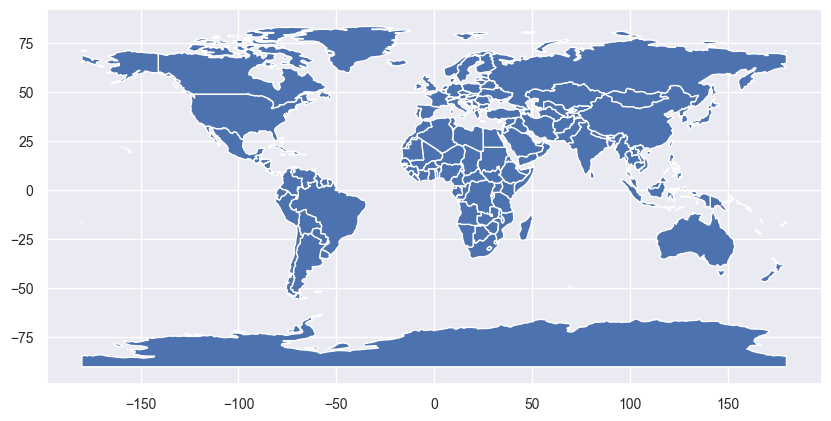

In [322]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

world.plot()

In [323]:
tableCustomMap = tableCustom.copy()

In [324]:
tableCustomMapCC = tableCustomMap.merge(dfEdStatsCountryLight, on='Country Name', how='left')

We rename the column `'Country Code'` for the join:

In [325]:
tableCustomMapCC.rename({'Country Code':'iso_a3'}, axis=1, inplace=True)

In [326]:
world_values = world.merge(tableCustomMapCC, how='outer', on='iso_a3', copy=True)
world_values = world_values[['iso_a3', 'geometry', 'Potential turnover']]

In [327]:
gpd.__version__

'0.12.1'

In [329]:
import mapclassify

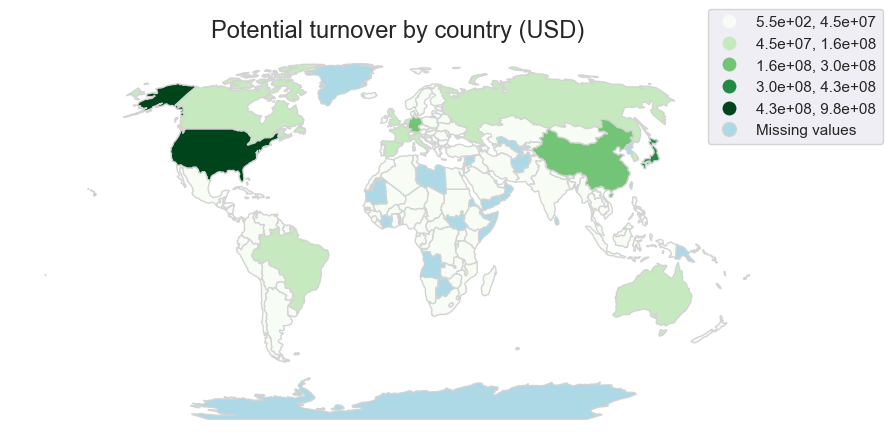

In [330]:
fig, ax = plt.subplots(1, 1)
title = "Potential turnover by country (USD)"
plt.title(title, fontsize=17)

world_values = world_values.to_crs('+proj=robin')
world_values.plot(column='Potential turnover', cmap='Greens', ax=ax, legend=True, # cax=cax,
#                   legend_kwds={'label': 'USD'},
                  legend_kwds={"fmt": "{:1.1e}",'loc':[0.9,0.75]},#'loc':'lower left'
                  edgecolor='lightgrey',
#                   k=8,
                  scheme='naturalbreaks', #'EqualInterval',
                  missing_kwds={"color": 'lightblue', # 'lightgrey'
#                                 "edgecolor": 'blue', # 'red'
#                                 "hatch": "/////", # "///"
                                "label": "Missing values"},
                  figsize=(20,15)
                 )
ax.set_axis_off();